In [1]:
import numpy as np


class VonNeumannPP:
    def __init__(self):
        pass

    def postprocess(self, sample_1, sample_2):
        bits_1 = np.ravel(np.array(sample_1) == 0).astype(np.int8)
        bits_2 = np.ravel(np.array(sample_2) == 0).astype(np.int8)

        arr = np.where(bits_1 > bits_2, np.zeros_like(bits_1), np.ones_like(bits_1))
        arr = np.where(bits_1 == bits_2, np.nan * np.ones_like(bits_1), arr)

        return arr[~np.isnan(arr)].astype(np.int8)

In [2]:
class VonNeumannPPl:
    def __init__(self):
        pass

    def postprocess(self, sample_1, sample_2):
        # Ensure both samples are of equal length by truncating to the length of the smaller sample
        min_length = min(len(sample_1), len(sample_2))
        sample_1 = sample_1[:min_length]
        sample_2 = sample_2[:min_length]

        # Convert the samples into bit arrays
        bits_1 = np.ravel(np.array(sample_1) == 0).astype(np.int8)
        bits_2 = np.ravel(np.array(sample_2) == 0).astype(np.int8)

        # Perform Von Neumann postprocessing
        arr = np.where(bits_1 > bits_2, np.zeros_like(bits_1), np.ones_like(bits_1))
        arr = np.where(bits_1 == bits_2, np.nan * np.ones_like(bits_1), arr)

        return arr[~np.isnan(arr)].astype(np.int8)


In [3]:
class CQTPP:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    def postprocess(self, sample_1, sample_2):
        ouput = np.array([], dtype=np.int8)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
        return ouput

In [4]:
pp = CQTPP()

In [12]:
pp.postprocess([1, 1,1,1,1],[0, 1, 0, 1, 0, 1])

array([1, 1, 1], dtype=int8)

In [10]:
vn= VonNeumannPP()

In [11]:
vn.postprocess([1, 0, 1, 0, 1, 0],[0, 1, 0, 1, 0, 1])

array([1, 0, 1, 0, 1, 0], dtype=int8)

In [4]:
import random
import matplotlib.pyplot as plt

# Assuming this is your custom preprocessor class

# Function to generate a random bitstring with probabilities for 0 and 1
def generate_bitstring(length=24, prob_zero=0.4):
    return ''.join(random.choices(['0', '1'], weights=[prob_zero, 1-prob_zero], k=length))

# Function to split the bitstring into two parts
def split_bitstring(bitstring):
    return bitstring[:12], bitstring[12:]

# Function to simulate the entire process and visualize the results
def simulate(n_iterations=1, prob_zero=0.5):
    processor = CQTPP()
    
    results_zero = []
    results_one = []

    for _ in range(n_iterations):
        # Generate a random bitstring
        bitstring = generate_bitstring()
        
        # Split the bitstring into two parts
        part1, part2 = split_bitstring(bitstring)
        
        # Preprocess the parts
        processed_part1 = processor.postprocess(part1, part2)
        processed_part1 = list(processed_part1)
        
        
        # After preprocessing, check if the distribution of 0s and 1s has changed
        print(part1)
        
    
    

# Run the simulation with a certain probability of 0s and 1s
simulate(n_iterations=1, prob_zero=0.3)  # Change prob_zero to control likelihood of 0


111100110111


In [5]:
import random
import matplotlib.pyplot as plt

# Assuming this is your custom preprocessor class
class PreProcessor:
    def __init__(self):
        # Initialize any necessary attributes
        pass
    
    def preprocess(self, bitlist):
        # Simulate your preprocessing (this should return the processed bitlist)
        return bitlist

# Function to generate a random bitstring as a list of bits with probabilities for 0 and 1
def generate_bitstring(length=24, prob_zero=0.5):
    return random.choices([0, 1], weights=[prob_zero, 1-prob_zero], k=length)


def generate_dependent_bitstring(length=24, prob_zero=0.5, transition_matrix=None):
    bitstring = []
    current_bit = 0 if random.random() < prob_zero else 1
    bitstring.append(current_bit)

    for _ in range(length - 1):
        # Transition based on the current bit
        if current_bit == 0:
            current_bit = 0 if random.random() < transition_matrix[0][0] else 1
        else:
            current_bit = 0 if random.random() < transition_matrix[1][0] else 1
        bitstring.append(current_bit)
    
    return bitstring

# Function to split the bitstring into two parts (each of length 12)
def split_bitstring(bitlist):
    return bitlist[:(len(bitlist)//2)], bitlist[(len(bitlist)//2):]

# Function to simulate the entire process and visualize the results
def simulate(n_iterations=1000, prob_zero=0.5):
    processor = VonNeumannPP()
    processor = CQTPP()
    
    
    results_zero = []
    results_one = []
    results_zero0 = []
    results_one1 = []
    bias= []
    biasb = []

    for _ in range(n_iterations):
        # Generate a random bitstring as a list of bits
        transition_matrix = [[0.8, 0.2],  # 0 -> 0 with 80% probability, 0 -> 1 with 20%
                         [0.3, 0.7]]
        bitlist = generate_bitstring(length=24, prob_zero=prob_zero)
        #print(bitlist)
        bitlist = list(a)
        
        # Split the bitlist into two parts
        part1, part2 = split_bitstring(bitlist)
        
        # Preprocess the parts
        
        processed_part1 = processor.postprocess(part1, part2)
        
        # After preprocessing, check if the distribution of 0s and 1s has changed

        
        results_zero0.append(bitlist.count(0))
        results_one1.append(bitlist.count(1))
        div = bitlist.count(0) + bitlist.count(1)
        if(div == 0):
            biasb.append(0)
        else:
            biasb.append(bitlist.count(0)/div)
        
        
        processed_part1= list(processed_part1)
        results_zero.append(processed_part1.count(0))
        results_one.append(processed_part1.count(1))
        div = processed_part1.count(0) + processed_part1.count(1)
        if(div == 0):
            bias.append(0)
        else:
            bias.append(processed_part1.count(0)/div)
    
    # Plot the results
    print("the dist before CQTPP: ", sum(biasb)/len(biasb))
    print("the dist after CQTPP: ",sum(bias)/len(bias))

# Run the simulation with a certain probability of 0s and 1s
simulate(n_iterations=1, prob_zero=0.2)  # Change prob_zero to control likelihood of 0


NameError: name 'a' is not defined

In [256]:
a = np.tile([0, 1, 1, 0, 1], 1000)


In [257]:
a[:100]

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [236]:
apart1, apart2 = split_bitstring(a)


In [237]:
p = CQTPP(dep_seq_len = 2)
p.postprocess(apart2,apart1)

array([], dtype=int8)

In [238]:
v = VonNeumannPP()
p.postprocess(apart1,apart2)

array([], dtype=int8)

In [6]:
import numpy as np

def generate_dependent_bitstring(length, bias=0.7, autocorr=0.5):
    """
    Generate a biased and dependent bitstring with specified autocorrelation.

    Parameters:
        length (int): The length of the bitstring.
        bias (float): Probability of a bit being 1, controls bias.
        autocorr (float): Autocorrelation coefficient (-1 <= autocorr <= 1).

    Returns:
        np.ndarray: A bitstring array with the desired properties.
    """
    # Initialize the bitstring
    bitstring = np.zeros(length, dtype=int)
    
    # Generate the first bit based on the bias
    bitstring[0] = 1 if np.random.rand() < bias else 0
    
    # Generate subsequent bits with dependence
    for i in range(1, length):
        # Compute the probability of the current bit being 1
        # Based on autocorrelation and previous bit
        prob = bias * (1 + autocorr * (2 * bitstring[i - 1] - 1))
        prob = max(0, min(prob, 1))  # Ensure probability is in [0, 1]
        
        # Sample the current bit
        bitstring[i] = 1 if np.random.rand() < prob else 0
    
    return bitstring




In [7]:
import numpy as np

def calculate_autocorrelation(bitstring, lag):
    """
    Calculate the autocorrelation of a binary bitstring at a given lag.

    Parameters:
        bitstring (np.ndarray): The binary bitstring (array of 0s and 1s).
        lag (int): The lag for which to calculate autocorrelation.

    Returns:
        float: The autocorrelation coefficient at the specified lag.
    """
    if lag >= len(bitstring):
        raise ValueError("Lag must be less than the length of the bitstring.")
    
    # Convert the bitstring to mean-centered values (-1 for 0, +1 for 1)
    values = 2 * bitstring - 1  # Convert 0 -> -1 and 1 -> +1
    
    # Calculate mean and variance
    mean = np.mean(values)
    variance = np.var(values)
    
    if variance == 0:
        return 0  # No variation, autocorrelation is undefined/zero

    # Compute the autocorrelation
    n = len(values)
    autocorr = np.sum((values[:n-lag] - mean) * (values[lag:] - mean)) / (n - lag) / variance
    
    return autocorr


In [263]:
# Example Usage
length = 100
bias = 0.5
autocorr = 0.8
bitstring = generate_dependent_bitstring(length, bias, autocorr)
bitstring

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [258]:
a

array([0, 1, 1, ..., 1, 0, 1])

In [276]:
calculate_autocorrelation(a, 5)

1.0

In [279]:
autocorr = []
for _ in range(1000):
    autocorr.append(calculate_autocorrelation(generate_dependent_bitstring(1000, 0.5, 0.4),1))
sum(autocorr)/len(autocorr)

0.39823550715488176

In [304]:
def simulate(n_iterations=1000, prob_zero=0.5):
    processor = VonNeumannPP()
    processor = CQTPP(dep_seq_len = 2)
    
    
    results_zero = []
    results_one = []
    results_zero0 = []
    results_one1 = []
    bias= []
    biasb = []
    autocorrafter = []
    autocorrbefore = []

    for _ in range(n_iterations):
        
        
        #print(bitlist)
        bitlist = generate_dependent_bitstring(1000, 0.6, 0.4)
        autocorrbefore.append(calculate_autocorrelation(bitlist,1))

        bitlist = list(bitlist)
        # Split the bitlist into two parts
        part1, part2 = split_bitstring(bitlist)
        
        # Preprocess the parts
        
        processed_part1 = processor.postprocess(part1, part2)
        
        # After preprocessing, check if the distribution of 0s and 1s has changed
        bitlist = np.asarray(bitlist)
        autocorrafter.append(calculate_autocorrelation(processed_part1,1))
        bitlist = list(bitlist)
        results_zero0.append(bitlist.count(0))
        results_one1.append(bitlist.count(1))
        div = bitlist.count(0) + bitlist.count(1)
        if(div == 0):
            biasb.append(0)
        else:
            biasb.append(bitlist.count(0)/div)
        
        
        processed_part1= list(processed_part1)
        results_zero.append(processed_part1.count(0))
        results_one.append(processed_part1.count(1))
        div = processed_part1.count(0) + processed_part1.count(1)
        if(div == 0):
            bias.append(0)
        else:
            bias.append(processed_part1.count(0)/div)
    
    # Plot the results
    print("the dist before CQTPP: ", sum(biasb)/len(biasb))
    print("the dist after CQTPP: ",sum(bias)/len(bias))
    print("The correltation Before CQTPP is" , sum(autocorrbefore)/len(autocorrbefore))

    print("The correltation After CQTPP is" , sum(autocorrafter)/len(autocorrafter))
    

# Run the simulation with a certain probability of 0s and 1s
simulate(n_iterations=1000, prob_zero=0.2)  # Change prob_zero to control likelihood of 0

the dist before CQTPP:  0.3084299999999993
the dist after CQTPP:  0.500116040765089
The correltation Before CQTPP is 0.4788542408311813
The correltation After CQTPP is 0.29779107375858715


In [286]:
bitlist = generate_dependent_bitstring(1000, 0.5, 0.4)
calculate_autocorrelation(bitlist,1)

0.4074074074074074

In [298]:
bitlist = list(bitlist)
        # Split the bitlist into two parts
part1, part2 = split_bitstring(bitlist)
        
        # Preprocess the parts
        
processed = CQTPP(dep_seq_len = 2).postprocess(part1, part2)

In [299]:
processedVN = VonNeumannPP().postprocess(part1, part2)

In [300]:
processedVN

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
      dtype=int8)

In [301]:
processed

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1], dtype=int8)

In [302]:
calculate_autocorrelation(processedVN, 1)

0.485829836404549

In [303]:
calculate_autocorrelation(processed, 1)

0.2843089628370172

In [698]:
import numpy as np
from collections import deque

class MKV1:

    def de_correlate(self, bitstring):

        if len(bitstring) < 2:
            raise ValueError("Bitstring must have at least 2 bits for decorrelation.")

        # Initialize queues
        queue0 = deque()
        queue1 = deque()

        # De-correlated output
        de_correlated_bits = []

        # Process each bit
        for i in range(len(bitstring)):
            current_bit = bitstring[i]

            if i == 0:
                # For the first bit, we cannot apply history-based routing
                de_correlated_bits.append(current_bit)
            else:
                previous_bit = bitstring[i - 1]

                # Route the current bit to the appropriate queue
                if previous_bit == 0:
                    queue0.append(current_bit)
                elif previous_bit == 1:
                    queue1.append(current_bit)

        # Dequeue bits alternately from the queues
        while queue0:
            de_correlated_bits.append(queue0.popleft())
        while queue1:
            de_correlated_bits.append(queue1.popleft())

        return np.array(de_correlated_bits, dtype=np.int8)



In [316]:
ProcessedMKV = MKV1().de_correlate(bitlist)

In [317]:
calculate_autocorrelation(ProcessedMKV, 1)

0.16116116116116116

In [318]:
bitlista = list(ProcessedMKV)
        # Split the bitlist into two parts
part1a, part2a = split_bitstring(bitlista)
        
        # Preprocess the parts
        
processedF = CQTPP(dep_seq_len = 2).postprocess(part1a, part2a)

In [320]:
calculate_autocorrelation(processedF, 1)

0.006828190013869632

In [321]:
len(processedF)

207

In [479]:
def simulate(n_iterations=1000, prob_zero=0.5):
    #processor = VonNeumannPP()
    processor = CQTPP(dep_seq_len = 2)
    
    
    results_zero = []
    results_one = []
    results_zero0 = []
    results_one1 = []
    bias= []
    biasb = []
    autocorrafter = []
    autocorrbefore = []

    
    lena = []

    for _ in range(n_iterations):
        
        
        #print(bitlist)
        bitlist = generate_dependent_bitstring(1000, 0.3, 0.8)
        autocorrbefore.append(calculate_autocorrelation(bitlist,1))
        

        
        #ProcessedMKV = bitlist

        #bitlist = list(ProcessedMKV)
        # Split the bitlist into two parts
        part1, part2 = split_bitstring(bitlist)
        
        # Preprocess the parts
        
        processed_part1 = processor.postprocess(part1, part2)
        ProcessedMKV = MKV1().de_correlate(processed_part1)
        processed_part1 = ProcessedMKV
        lena.append(len(processed_part1))
        #processed_part1 = np.asarray(part1 + part2)
        
        # After preprocessing, check if the distribution of 0s and 1s has changed
        #bitlist = 
        autocorrafter.append(calculate_autocorrelation(np.asarray(processed_part1),1))
        bitlist = list(bitlist)
        results_zero0.append(bitlist.count(0))
        results_one1.append(bitlist.count(1))
        div = bitlist.count(0) + bitlist.count(1)
        if(div == 0):
            biasb.append(0)
        else:
            biasb.append(bitlist.count(0)/div)
        
        
        processed_part1= list(processed_part1)
        results_zero.append(processed_part1.count(0))
        results_one.append(processed_part1.count(1))
        div = processed_part1.count(0) + processed_part1.count(1)
        if(div == 0):
            bias.append(0)
        else:
            bias.append(processed_part1.count(0)/div)
    
    # Plot the results
    print("the dist before CQTPP: ", sum(biasb)/len(biasb))
    print("the dist after CQTPP: ",sum(bias)/len(bias))
    print("The correltation Before CQTPP is" , sum(autocorrbefore)/len(autocorrbefore))

    print("The correltation After CQTPP is" , sum(autocorrafter)/len(autocorrafter))
    print("The length afte:" ,sum(lena)/len(lena))
    print("Waste:", ((1000-(sum(lena)/len(lena)))/1000) )
    

# Run the simulation with a certain probability of 0s and 1s
simulate(n_iterations=1000, prob_zero=0.2)  # Change prob_zero to control likelihood of 0

the dist before CQTPP:  0.8832439999999979
the dist after CQTPP:  0.49546639392108527
The correltation Before CQTPP is 0.4788624595860111
The correltation After CQTPP is 0.0524401081415897
The length afte: 75.455
Waste: 0.924545


In [344]:
class CQTPP2:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    def postprocess(self, sample):
        sample_1 , sample_2 = split_bitstring(sample)
        ouput = np.array([], dtype=np.int8)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
        return ouput

In [8]:
import numpy as np

def calculate_entropy(bitstring):
    """
    Calculate the entropy of a given bitstring.

    Parameters:
        bitstring (array-like): A list or numpy array of binary values (0s and 1s).

    Returns:
        float: The entropy of the bitstring in bits.
    """
    # Convert to numpy array
    bitstring = np.asarray(bitstring)
    
    # Calculate the probabilities of 0 and 1
    prob_0 = np.mean(bitstring == 0)
    prob_1 = np.mean(bitstring == 1)
    
    # Avoid log of zero by filtering out zero probabilities
    probabilities = np.array([prob_0, prob_1])
    probabilities = probabilities[probabilities > 0]
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


In [459]:
def MySimualation():

    before  = []
    bef_ent = []
    aft_ent = []
    after = []
    for _ in range(1000):
        
        inputList = generate_dependent_bitstring(1000, 0.5, 0.5)
        before.append(calculate_autocorrelation(inputList, 1))
        bef_ent.append(calculate_entropy(inputList))

        #Output = CQTPP2(dep_seq_len = 2).postprocess((inputList))
        
        Output = CQTPP2(dep_seq_len = 2).postprocess((inputList))
        Output = MKV1().de_correlate(Output)
        #Output = VonNeumannPP().postprocess(inputList[])
        aft_ent.append(calculate_entropy(Output))
        after.append(calculate_autocorrelation(Output, 1))

    print("Before Corr: " ,sum(before)/len(before))
    print("Before Entopy: " ,sum(bef_ent)/len(bef_ent))
    print("\n")
    print("After Corr: " ,sum(after)/len(after))
    print("After Entopy: " ,sum(aft_ent)/len(aft_ent))
    

In [460]:
MySimualation()

Before Corr:  0.4996471545241866
Before Entopy:  0.9976687530035641


After Corr:  0.07460121582589281
After Entopy:  0.9922011582868632


In [436]:
calculate_autocorrelation(generate_dependent_bitstring2(100, 0.5,0.5),1)

-0.07407407407407401

In [419]:
generate_dependent_bitstring2(100, 0.5,0.99)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [496]:
import numpy as np

class IteratingVonNeumann:
    def __init__(self):
        pass

    def postprocess(self, sample_1, sample_2):
        """
        Von Neumann Postprocessing: 
        - If input pair is '01', output '0'.
        - If input pair is '10', output '1'.
        - Discard '00' and '11'.
        """
        # Identify valid pairs and assign outputs
        arr = np.where(sample_1 > sample_2, 0, 1)
        arr = np.where(sample_1 == sample_2, np.nan, arr)
        return arr[~np.isnan(arr)].astype(np.int8)

    def xor_block(self, sample_1, sample_2):
        """
        XOR Block: 
        - If the pairs are '00' or '11', output '0'.
        - If the pairs are '01' or '10', output '1'.
        """
        return (sample_1 ^ sample_2).astype(np.int8)

    def r_block(self, sample_1, sample_2):
        """
        R Block: 
        - If the pairs are '00', output '0'.
        - If the pairs are '11', output '1'.
        - Discard '01' and '10'.
        """
        r_output = np.where((sample_1 == 0) & (sample_2 == 0), 0,
                            np.where((sample_1 == 1) & (sample_2 == 1), 1, np.nan))
        return r_output[~np.isnan(r_output)].astype(np.int8)

    def iterating_von_neumann(self, raw_bitstring, max_iterations=100):
        """
        Iteratively apply Von Neumann Postprocessing and reuse discarded bits.
        
        Parameters:
            raw_bitstring (np.ndarray): Input raw bit sequence (1D array of 0s and 1s).
            max_iterations (int): Maximum number of iterations.
        
        Returns:
            np.ndarray: The final unbiased bitstring.
        """
        output = np.array([], dtype=np.int8)
        discarded_bits = raw_bitstring

        for _ in range(max_iterations):
            # Split the bitstream into two samples
            if len(discarded_bits) % 2 != 0:  # Ensure even length
                discarded_bits = discarded_bits[:-1]
            sample_1 = discarded_bits[0::2]
            sample_2 = discarded_bits[1::2]

            # Von Neumann post-processing
            vn_output = self.postprocess(sample_1, sample_2)
            output = np.append(output, vn_output)

            # Collect discarded bits for the next iteration
            xor_output = self.xor_block(sample_1, sample_2)
            r_output = self.r_block(sample_1, sample_2)
            discarded_bits = np.append(xor_output, r_output)

        return output

In [497]:
test = generate_dependent_bitstring(100, 0.4,0)
test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [498]:
IteratingVonNeumann().iterating_von_neumann(np.asarray([0, 1, 0, 0, 1, 1, 0, 1]))

array([1, 1, 0, 1, 1, 1], dtype=int8)

In [630]:


class ITCQTPP:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """
    
    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    def postprocess(self, sample_1, sample_2):
        output = np.array([], dtype=np.int8)
          # To store discarded bits
        
        # Iterate for a fixed number of iterations
                  
            # Process the sequences
        discarded_bits = np.array([], dtype=np.int8)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            
            if np.size(postprocess_output):
                output = np.append(output, np.array([postprocess_output[0]]))
                # Store the discarded bits (all except the first one)
                discarded_bits = np.append(discarded_bits, postprocess_output[1:])
                
        #print("dis: ", discarded_bits)
            
            
        return np.append(output,discarded_bits)

In [615]:
for _ in range(1000):
    outs = []
    s1,s2 = split_bitstring(generate_dependent_bitstring(1000, 0.4, 0.4))
    o, d = ITCQTPP(dep_seq_len = 2).postprocess(s1,s2)
    outs.append(calculate_autocorrelation(o,1))

print(sum(outs)/len(outs))

0.1214350238740483


In [641]:


class ITCQTPP:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """
    
    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    def postprocess(self, sample_1, sample_2):
        output = np.array([], dtype=np.int8)
          # To store discarded bits
        
        # Iterate for a fixed number of iterations
                  
            # Process the sequences
        discarded_bits = np.array([], dtype=np.int8)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            
            if np.size(postprocess_output):
                output = np.append(output, np.array([postprocess_output[0]]))
                # Store the discarded bits (all except the first one)
                discarded_bits = np.append(discarded_bits, postprocess_output[1:])
                
        #print("dis: ", discarded_bits)
            
            
        return output, discarded_bits

In [636]:

def shannon_entropy_bound(sequence):
    """
    Calculate the Shannon entropy bound for a binary sequence.

    Parameters:
        sequence (list or np.ndarray): The binary sequence (list of 0s and 1s).

    Returns:
        float: The Shannon entropy bound.
    """
    sequence = np.array(sequence)
    p = np.mean(sequence)  # Probability of 1s
    q = 1 - p              # Probability of 0s
    
    # Handle edge cases where p or q is 0 to avoid log(0)
    if p == 0 or q == 0:
        return 0.0
    
    # Shannon entropy formula
    entropy = -p * np.log2(p) - q * np.log2(q)
    return entropy




In [662]:
def simulate(n_iterations=1000, prob_zero=0.5):
    #processor = VonNeumannPP()
    processor = ITCQTPP(dep_seq_len = 2)
    
    
    results_zero = []
    results_one = []
    results_zero0 = []
    results_one1 = []
    bias= []
    biasb = []
    autocorrafter = []
    autocorrbefore = []
    entb = [] 
    enta= []

    
    lena = []
    disclen = []

    for _ in range(n_iterations):
        
        
        #print(bitlist)
        bitlist = generate_dependent_bitstring(1000, 0.3, 0.8)
        entb.append(shannon_entropy_bound(bitlist))
        autocorrbefore.append(calculate_autocorrelation(bitlist,1))
        

        
        #ProcessedMKV = bitlist

        #bitlist = list(ProcessedMKV)
        # Split the bitlist into two parts
        part1, part2 = split_bitstring(bitlist)
        
        # Preprocess the parts
        
        processed_part1, disc = processor.postprocess(part1, part2)
        
        d1, d2 = split_bitstring(disc)
        prcssddisc = IteratingVonNeumann().iterating_von_neumann(np.asarray(disc))
        #print(disc2)
        disclen.append(len(prcssddisc))
        #disclen.append((disc))
        
        #processed_part1 = bitlist
        ProcessedMKV = MKV1().de_correlate(np.append(processed_part1, prcssddisc))
        processed_part1 = ProcessedMKV
        lena.append(len(processed_part1))
        enta.append(shannon_entropy_bound(processed_part1))
        #processed_part1 = np.asarray(part1 + part2)
        
        # After preprocessing, check if the distribution of 0s and 1s has changed
        #bitlist = 
        autocorrafter.append(calculate_autocorrelation(np.asarray(processed_part1),1))
        bitlist = list(bitlist)
        results_zero0.append(bitlist.count(0))
        results_one1.append(bitlist.count(1))
        div = bitlist.count(0) + bitlist.count(1)
        if(div == 0):
            biasb.append(0)
        else:
            biasb.append(bitlist.count(0)/div)
        
        
        processed_part1= list(processed_part1)
        results_zero.append(processed_part1.count(0))
        results_one.append(processed_part1.count(1))
        div = processed_part1.count(0) + processed_part1.count(1)
        if(div == 0):
            bias.append(0)
        else:
            bias.append(processed_part1.count(0)/div)
    
    # Plot the results
    print("the dist before CQTPP: ", sum(biasb)/len(biasb))
    print("the dist after CQTPP: ",sum(bias)/len(bias))
    print("The correltation Before CQTPP is" , sum(autocorrbefore)/len(autocorrbefore))

    print("The correltation After CQTPP is" , sum(autocorrafter)/len(autocorrafter))
    print(f"Shannon entropy bound Befroe: {sum(entb)/len(entb):.4f}")
    print(f"Shannon entropy bound After: {sum(enta)/len(enta):.4f}")
    print("The length afte:" ,sum(lena)/len(lena))
    print("Waste:", ((1000-(sum(lena)/len(lena)))/1000) )
    print("Length of discraded Bits aftr processing: ", (sum(disclen))/len(disclen))
    

# Run the simulation with a certain probability of 0s and 1s
simulate(n_iterations=1000, prob_zero=0.2)  # Change prob_zero to control likelihood of 0

the dist before CQTPP:  0.8843149999999991
the dist after CQTPP:  0.49376236148550123
The correltation Before CQTPP is 0.4750091331393299
The correltation After CQTPP is 0.042847456998689984
Shannon entropy bound Befroe: 0.5148
Shannon entropy bound After: 0.9875
The length afte: 97.084
Waste: 0.9029159999999999
Length of discraded Bits aftr processing:  22.138


In [652]:
import itertools
import numpy as np

class VN_N:
    def __init__(self, N):
        self.N = N
    
    def process(self, bitlist):
        if len(bitlist) % self.N != 0:
            raise ValueError(f"Input length must be a multiple of {self.N}.")
        
        groups = [bitlist[i:i + self.N] for i in range(0, len(bitlist), self.N)]
        output = []
        
        for group in groups:
            num_ones = sum(group)
            total_combinations = len(list(itertools.combinations(range(self.N), num_ones)))
            assigned_bits = int(np.floor(np.log2(total_combinations)))
            
            if assigned_bits > 0:
                binary_indices = np.arange(2 ** assigned_bits)
                output.extend(binary_indices[:2 ** assigned_bits].tolist())
        
        return output


In [656]:
!pip install nistrng

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nistrng: filename=nistrng-1.2.3-py3-none-any.whl size=38116 sha256=b18df0e270109503ab132f686ec411e46f0395520ab7925c2b7267a94c1229bf
  Stored in directory: c:\users\client\appdata\local\pip\cache\wheels\46\a2\c9\b753ddd50c60323c31569907f4bee42190a7f3dcea7a10eab4
Successfully built nistrng


In [657]:
from nistrng import *

In [663]:
import numpy
sequence: numpy.ndarray = numpy.random.randint(-128, 128, 1000, dtype=int)
binary_sequence: numpy.ndarray = pack_sequence(sequence)
# Print sequence
print("Random sequence generated by NumPy:")
#print(sequence)
print("Random sequence generated by NumPy encoded in 8-bit signed format:")
#print(binary_sequence)
print(type(binary_sequence))
print("Original sequence taken back by unpacking (to check the correctness of packing process:")
#print(unpack_sequence(binary_sequence))
# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)
# Print the eligible tests
print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
    else:
        print("- FAILED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")

Random sequence generated by NumPy:
Random sequence generated by NumPy encoded in 8-bit signed format:
<class 'numpy.ndarray'>
Original sequence taken back by unpacking (to check the correctness of packing process:
Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_ones_in_a_block
-dft
-non_overlapping_template_matching
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- PASSED - score: 0.123 - Monobit - elapsed time: 0 ms
- PASSED - score: 0.278 - Frequency Within Block - elapsed time: 0 ms
- PASSED - score: 0.271 - Runs - elapsed time: 2 ms
- PASSED - score: 0.32 - Longest Run Ones In A Block - elapsed time: 10 ms
- PASSED - score: 0.758 - Discrete Fourier Transform - elapsed time: 1 ms
- PASSED - score: 0.993 - Non Overlapping Template Matching - elapsed time: 50 ms
- PASSED - score: 0.781 - Serial - elapsed time: 350 ms
- PASSED - score: 0.405 - Approximate Entropy - elapsed time: 320 ms
- P

In [680]:


FinalBitList = []
FinalBitList = np.asarray(FinalBitList)

while (FinalBitList.size <= 8000):
    bitlist = generate_dependent_bitstring(1000, 0.3, 0.8)

    part1, part2 = split_bitstring(bitlist)
    
    processed_part1 = CQTPP(dep_seq_len = 2).postprocess(part1, part2)
    
    d1, d2 = split_bitstring(disc)
    
    #prcssddisc = IteratingVonNeumann().iterating_von_neumann(np.asarray(disc))
    
    #disclen.append(len(prcssddisc))
    
    ProcessedMKV = MKV1().de_correlate(np.append(processed_part1, prcssddisc))
    
    np.append(FinalBitList, ProcessedMKV)

print(FinalBitList)
    

    
    

KeyboardInterrupt: 

In [719]:
from tqdm import tqdm
import numpy as np

FinalBitList = []
FinalBitList = np.asarray(FinalBitList)

# Set the total iterations to be the maximum number of iterations
max_iterations = 8000

# Use tqdm to show progress
with tqdm(total=max_iterations, desc="Processing", unit="bit") as pbar:
    while FinalBitList.size <= max_iterations:
        bitlist = generate_dependent_bitstring(1000, 0.5, 0.1)

        part1, part2 = split_bitstring(bitlist)
        
        processed_part1 = CQTPP(dep_seq_len = 10).postprocess(part1, part2)
        
        d1, d2 = split_bitstring(disc)
        
        #prcssddisc = IteratingVonNeumann().iterating_von_neumann(np.asarray(disc))
        
        # Processed MKV
        #ProcessedMKV = MKV1().de_correlate(np.append(processed_part1, prcssddisc))
        ProcessedMKV = MKV1().de_correlate(processed_part1)
        #ProcessedMKV = processed_part1
        
        # Append the new processed data to FinalBitList
        FinalBitList = np.append(FinalBitList, ProcessedMKV)

        # Update the progress bar based on the size of the FinalBitList
        pbar.update(ProcessedMKV.size)

print(FinalBitList)


Processing: 100008bit [00:09, 10551.56bit/s]                                                                           


[1. 1. 0. ... 1. 0. 0.]


In [720]:
calculate_entropy(FinalBitList)

0.9999812406712838

In [721]:
import numpy
binary_sequence = np.asarray(FinalBitList, dtype=int)
#print(unpack_sequence(binary_sequence))
# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)
# Print the eligible tests
print("Eligible test from NIST-SP800-22r1a:")
for name in eligible_battery.keys():
    print("-" + name)
# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
print("Test results:")
passed = 0
failed = 0
for result, elapsed_time in results:
    if result.passed:
        print("- PASSED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
        passed=passed + 1
    else:
        print("- FAILED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
        failed=failed + 1
print("Passed: ", passed, "/", passed+failed)

Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_ones_in_a_block
-binary_matrix_rank
-dft
-non_overlapping_template_matching
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- PASSED - score: 0.107 - Monobit - elapsed time: 0 ms
- PASSED - score: 0.699 - Frequency Within Block - elapsed time: 0 ms
- PASSED - score: 0.843 - Runs - elapsed time: 24 ms
- PASSED - score: 0.291 - Longest Run Ones In A Block - elapsed time: 1 ms
- PASSED - score: 0.141 - Binary Matrix Rank - elapsed time: 195 ms
- FAILED - score: 0.0 - Discrete Fourier Transform - elapsed time: 23 ms
- PASSED - score: 0.327 - Non Overlapping Template Matching - elapsed time: 230 ms
- FAILED - score: nan - Serial - elapsed time: 2987 ms
- FAILED - score: 0.0 - Approximate Entropy - elapsed time: 1844 ms
- FAILED - score: 0.0 - Cumulative Sums - elapsed time: 72 ms
- FAILED - score: 0.683 - Random Excursion - elapsed time: 250 ms
- P

In [725]:
import glob, os, requests
available_data = glob.glob("data/*")
file = "borealis.npy"
data_url = "https://qca-data.s3.amazonaws.com/fig4/samples.npy"

if os.path.join("data", file) not in available_data:
        print("Downloading the data:", file)
        d = requests.get(data_url)
        open(os.path.join("data", file), "wb").write(d.content)

In [726]:
data_borealis = np.load("data/borealis.npy")

In [727]:
data_borealis = np.ravel(data_borealis)

In [728]:
data_borealis

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [730]:
data_borealis.size

221616000

In [747]:
calculate_autocorrelation(data_borealis,8)

0.005534973275362695

In [744]:
parti1, parti2 = split_bitstring(data_borealis)
calculate_autocorrelation(VonNeumannPP().postprocess(parti1,parti2),1)

0.01831110968663495

In [68]:
class CQTPPTest:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    def postprocess(self, input):
        ouput = np.array([], dtype=np.int8)
        zeroes = 0
        Ones = 0
        Nothing = 0
        sample_1, sample_2 = split_bitstring(input)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
                if postprocess_output[0] == 0:
                    zeroes = zeroes +1
                else:
                    Ones = Ones + 1
            else:
                Nothing = Nothing + 1
                
        return zeroes, Ones, Nothing, ouput

In [16]:
sp1 = (generate_dependent_bitstring(1000, 0.6,0.2))
print(CQTPPTest(dep_seq_len =2).postprocess(sp1))

(85, 82, 83)


In [30]:
from tqdm import tqdm
import numpy as np

a = []
b = []
c = []

# Use tqdm for progress tracking
for _ in tqdm(range(10000), desc="Processing"):
    sp1 = generate_dependent_bitstring(1000, 0.4, 0.5)
    a1, b2, c3 = CQTPPTest(dep_seq_len=2).postprocess(sp1)
    a.append(a1)
    b.append(b2)
    c.append(c3)

print("Mean of a (zeroes):", np.mean(a))
print("Mean of b (ones):", np.mean(b))
print("Mean of c (nothing):", np.mean(c))


Processing: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [01:40<00:00, 99.44it/s]

Mean of a (zeroes): 79.9211
Mean of b (ones): 80.0324
Mean of c (nothing): 90.0465


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
# Parameters for the experiment
num_repetitions = 100  # Number of times to repeat the experiment
size = 1000  # Size of the bitstring
zero_prob = 0.6  # Probability of zeros
autocorrelation = 0.2  # Autocorrelation factor

# Initialize lists to track the counts
zeroes_counts = []
ones_counts = []
nothing_counts = []

# Run the experiment repeatedly
for _ in range(num_repetitions):
    input = generate_dependent_bitstring(size, zero_prob, autocorrelation)
    zeroes, ones, nothing = CQTPPTest(dep_seq_len=2).postprocess(input)
    zeroes_counts.append(zeroes)
    ones_counts.append(ones)
    nothing_counts.append(nothing_counts)
    
    
        
print(numpy.mean(zeroes_counts))
print(numpy.mean(ones_counts))
print(numpy.mean(nothing_counts))


NameError: name 'CQTPPTest' is not defined

In [33]:
from tqdm import tqdm
import numpy as np

a = []
b = []
c = []
p_01 = []  # List to store probabilities of '01'
p_10 = []  # List to store probabilities of '10'
p_00 = [] 
p_11 = []

for _ in tqdm(range(10000), desc="Processing"):
    sp1 = generate_dependent_bitstring(1000, 0.4, 0.5)  # Assuming sp1 is a NumPy array of 0s and 1s
    a1, b2, c3 = CQTPPTest(dep_seq_len=2).postprocess(sp1)
    a.append(a1)
    b.append(b2)
    c.append(c3)
    
    # Calculate probabilities of '01' and '10'
    total_pairs = len(sp1) - 1
    count_01 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 1)
    count_10 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 0)
    count_00 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 0)
    count_11 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 1)
    
    p_01.append(count_01 / total_pairs)
    p_10.append(count_10 / total_pairs)
    p_11.append(count_11 / total_pairs)
    p_00.append(count_00 / total_pairs)

print("Mean of a (zeroes):", np.mean(a))
print("Mean of b (ones):", np.mean(b))
print("Mean of c (nothing):", np.mean(c))
print("Mean probability of '01':", np.mean(p_01))
print("Mean probability of '10':", np.mean(p_10))
print("Mean probability of '00':", np.mean(p_00))
print("Mean probability of '11':", np.mean(p_11))


Processing: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [01:48<00:00, 92.09it/s]

Mean of a (zeroes): 79.9991
Mean of b (ones): 80.0003
Mean of c (nothing): 90.0006
Mean probability of '01': 0.13331791791791792
Mean probability of '10': 0.13337927927927928
Mean probability of '00': 0.5330563563563563
Mean probability of '11': 0.20024644644644646


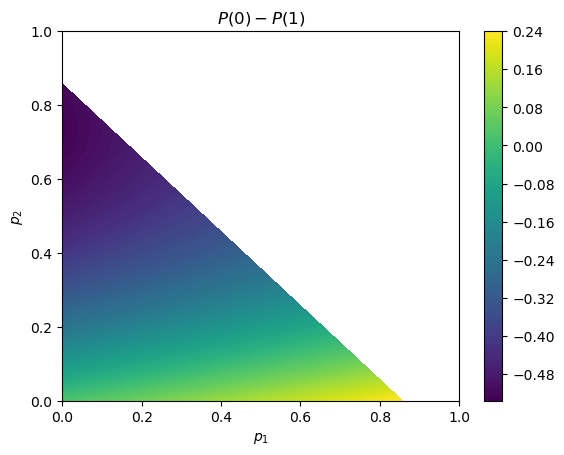

In [42]:
def ex1_p_0(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p3)
    return p1 * p2 + p1 * p2 +p2*p2+ p2 * p3 + p2*p4 + p4*p2
def ex1_p_1(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p4)
    return p1 * p3 + p3*p1 + p3*p2 + p3*p3 + p3*p4 + p4*p3





def ex1_diff_p00_p01(p1, p2, p3):
    return  ex1_p_0(p1, p2, p3) - ex1_p_1(p1, p2, p3)


p1 = np.linspace(0, 1)
p2 = np.linspace(0, 1)
p3 = np.linspace(0, 1)
mp1, mp2 = np.meshgrid(p1, p2)
plt.contourf(mp1, mp2, ex1_diff_p00_p01(mp1,0.13 , mp2), levels=100)
plt.colorbar()
plt.xlabel("$p_1$")
plt.ylabel("$p_2$")
plt.title("$P(0) - P(1)$")
plt.show()

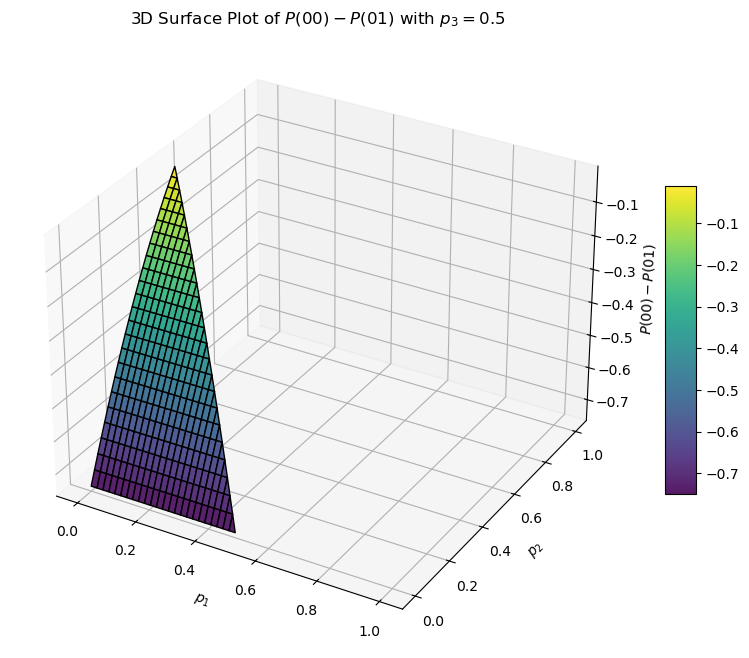

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ex1_p_0(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p4)
    return p1 * p2 + p1 * p2 + p2 * p2 + p2 * p3 + p2 * p4 + p4 * p2

def ex1_p_1(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p4)
    return p1 * p3 + p3 * p1 + p3 * p2 + p3 * p3 + p3 * p4 + p4 * p3

def ex1_diff_p00_p01(p1, p2, p3):
    return ex1_p_0(p1, p2, p3) - ex1_p_1(p1, p2, p3)

# Define parameter ranges
p1 = np.linspace(0, 1, 50)
p2 = np.linspace(0, 1, 50)
p3 = np.linspace(0, 1, 50)  # Fixed value of p3 for 3D plotting

# Create a meshgrid for p1 and p2
mp1, mp2, mp3 = np.meshgrid(p1, p2, p3)

# Compute the z values
z = ex1_diff_p00_p01(mp1, mp2, p3_fixed)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(mp1, mp2, z, cmap="viridis", edgecolor='k', alpha=0.9)

# Add labels and a color bar
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$P(00) - P(01)$')
ax.set_title('3D Surface Plot of $P(00) - P(01)$ with $p_3 = 0.5$')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


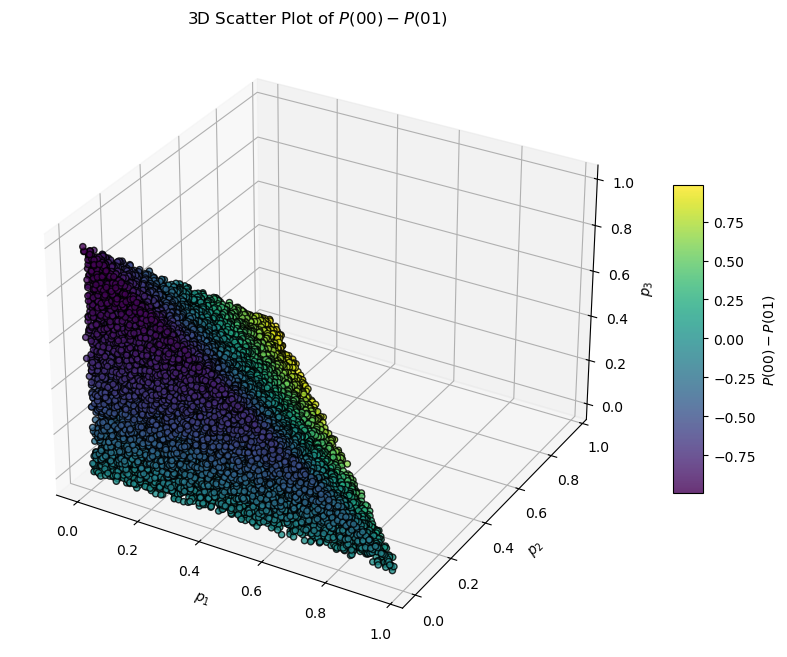

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def ex1_p_0(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p4)  # Replace invalid values with NaN
    return p1 * p2 + p1 * p2 + p2 * p2 + p2 * p3 + p2 * p4 + p4 * p2

def ex1_p_1(p1, p2, p3):
    p4 = 1 - p1 - p2 - p3
    p4 = np.where(p4 < 0, np.nan, p4)  # Replace invalid values with NaN
    return p1 * p3 + p3 * p1 + p3 * p2 + p3 * p3 + p3 * p4 + p4 * p3

def ex1_diff_p00_p01(p1, p2, p3):
    return ex1_p_0(p1, p2, p3) - ex1_p_1(p1, p2, p3)

# Generate random values for p1, p2, and p3
n_points = 200000  # Number of points to plot
p1 = np.random.uniform(0, 1, n_points)
p2 = np.random.uniform(0, 1, n_points)
p3 = np.random.uniform(0, 1, n_points)

# Compute the difference
diff = ex1_diff_p00_p01(p1, p2, p3)

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot( projection='3d')

# Scatter plot with colormap
scatter = ax.scatter(p1, p2, p3, c=diff, cmap='viridis', edgecolor='k', alpha=0.8)

# Add axis labels and a colorbar
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$')
ax.set_title('3D Scatter Plot of $P(00) - P(01)$')
fig.colorbar(scatter, label='$P(00) - P(01)$', shrink=0.5, aspect=10)

plt.show()


In [49]:
import numpy as np

def generate_correlated_bitstring(p, corr_matrix, size=1):
    """
    Generate correlated binary bitstrings based on the method from the paper.
    
    Parameters:
        p (list): Marginal probabilities for each binary variable.
        corr_matrix (np.array): Desired correlation matrix (symmetric, positive definite).
        size (int): Number of samples to generate.
    
    Returns:
        np.array: Matrix of size (size, len(p)) containing correlated binary bitstrings.
    """
    k = len(p)
    q = [1 - pi for pi in p]  # Complement probabilities
    a = np.zeros((k, k))  # Initialize coefficients matrix

    # Compute the aij coefficients
    for i in range(k):
        for j in range(k):
            if i == j:
                a[i, j] = -np.log(p[i])
            else:
                pij = corr_matrix[i, j]
                if pij > 0:  # Ensure non-negative correlation
                    a[i, j] = np.log(1 + pij * (q[i] * q[j]) ** 0.5 / (p[i] * p[j]))

    # Generate Poisson variables
    y = np.zeros((size, k))
    for i in range(k):
        for j in range(k):
            if a[i, j] > 0:
                y[:, i] += np.random.poisson(a[i, j], size=size)
    
    # Convert to binary variables
    z = (y > 0).astype(int)
    return z

# Example usage
p = [0.7, 0.8, 0.6]  # Marginal probabilities
corr_matrix = np.array([
    [1.0, 0.5, 0.4],
    [0.5, 1.0, 0.3],
    [0.4, 0.3, 1.0]
])  # Desired correlation matrix
bitstrings = generate_correlated_bitstring(p, corr_matrix, size=1000)
print(bitstrings)


[[1 1 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 1 1]
 [0 0 1]
 [1 1 1]]


In [50]:
import numpy as np

def autocorrelation(bitstream):
    """
    Quantifies the autocorrelation of a bitstream at various lags.
    
    Parameters:
        bitstream (list): A list of bits (1s and 0s).
        
    Returns:
        list: A list of autocorrelation values for different lags.
    """
    # Convert bitstream to a numpy array
    bitstream = np.array(bitstream)
    
    # Calculate the mean of the bitstream
    mean = np.mean(bitstream)
    
    # Calculate the total variance (denominator)
    variance = np.var(bitstream)
    
    # Initialize an empty list to store autocorrelation values
    autocorr_values = []
    
    # Loop through different lags (from 0 to len(bitstream)-1)
    for lag in range(len(bitstream)):
        # Calculate the shifted version of the bitstream
        shifted_bitstream = bitstream[:-lag] if lag > 0 else bitstream
        
        # Calculate the autocorrelation for this lag
        autocorr = np.corrcoef(bitstream[lag:], shifted_bitstream)[0, 1]
        
        # Normalize the autocorrelation value by the variance
        autocorr_values.append(autocorr)
    
    return autocorr_values


In [51]:
import numpy as np

def generate_exponential_decay(length, decay_rate=0.1):
    """
    Generate a bitstream with an exponential decay autocorrelation structure.
    
    Parameters:
        length (int): The length of the bitstream.
        decay_rate (float): Rate of exponential decay. Default is 0.1.
        
    Returns:
        list: A list of bits (1s and 0s) with exponential decay correlation.
    """
    bitstream = []
    for i in range(length):
        # The probability of a 1 decays exponentially with distance
        prob = np.exp(-decay_rate * i)
        bitstream.append(1 if np.random.rand() < prob else 0)
    return bitstream


In [52]:
def generate_gaussian(length, stddev=5):
    """
    Generate a bitstream with a Gaussian autocorrelation structure.
    
    Parameters:
        length (int): The length of the bitstream.
        stddev (float): Standard deviation for the Gaussian decay. Default is 5.
        
    Returns:
        list: A list of bits (1s and 0s) with Gaussian correlation.
    """
    bitstream = []
    for i in range(length):
        # The probability of a 1 follows a Gaussian distribution
        prob = np.exp(-0.5 * (i**2 / stddev**2))
        bitstream.append(1 if np.random.rand() < prob else 0)
    return bitstream


In [53]:
def generate_sinusoidal(length, period=20):
    """
    Generate a bitstream with a sinusoidal autocorrelation structure.
    
    Parameters:
        length (int): The length of the bitstream.
        period (int): The period of the sinusoidal wave. Default is 20.
        
    Returns:
        list: A list of bits (1s and 0s) with sinusoidal correlation.
    """
    bitstream = []
    for i in range(length):
        # Use sine wave to determine the probability
        prob = (np.sin(2 * np.pi * i / period) + 1) / 2  # Map sine output to [0, 1]
        bitstream.append(1 if np.random.rand() < prob else 0)
    return bitstream


In [61]:
# Set the length of the bitstream
length = 1000

# Generate bitstreams for each autocorrelation structure
exp_decay_bitstream = generate_exponential_decay(length)
gaussian_bitstream = generate_gaussian(length)
sinusoidal_bitstream = generate_sinusoidal(length)

# Print the bitstreams
print("Exponential Decay Bitstream:", exp_decay_bitstream)
print("Gaussian Bitstream:", gaussian_bitstream)
print("Sinusoidal Bitstream:", sinusoidal_bitstream)


Exponential Decay Bitstream: [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
CQTPPTest

In [67]:
from tqdm import tqdm
import numpy as np

a = []
b = []
c = []
p_01 = []  # List to store probabilities of '01'
p_10 = []  # List to store probabilities of '10'
p_00 = [] 
p_11 = []

for _ in tqdm(range(10000), desc="Processing"):
    sp1 = numpy.asarray(generate_sinusoidal(1000))  # Assuming sp1 is a NumPy array of 0s and 1s
    a1, b2, c3 = CQTPPTest(dep_seq_len=2).postprocess(sp1)
    a.append(a1)
    b.append(b2)
    c.append(c3)
    
    # Calculate probabilities of '01' and '10'
    total_pairs = len(sp1) - 1
    count_01 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 1)
    count_10 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 0)
    count_00 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 0)
    count_11 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 1)
    
    p_01.append(count_01 / total_pairs)
    p_10.append(count_10 / total_pairs)
    p_11.append(count_11 / total_pairs)
    p_00.append(count_00 / total_pairs)

print("Mean of a (zeroes):", np.mean(a))
print("Mean of b (ones):", np.mean(b))
print("Mean of c (nothing):", np.mean(c))
print("Mean probability of '01':", np.mean(p_01))
print("Mean probability of '10':", np.mean(p_10))
print("Mean probability of '00':", np.mean(p_00))
print("Mean probability of '11':", np.mean(p_11))

Processing: 100%|███████████████████████████████████████████████████████████████| 10000/10000 [01:31<00:00, 109.25it/s]

Mean of a (zeroes): 51.4959
Mean of b (ones): 51.6499
Mean of c (nothing): 146.8542
Mean probability of '01': 0.13085605605605607
Mean probability of '10': 0.13102022022022022
Mean probability of '00': 0.3689944944944945
Mean probability of '11': 0.36912922922922925


In [69]:
import numpy as np


class VonNeumannPPTEST:
    def __init__(self):
        pass

    def postprocess(self, input):

        sample_1, sample_2 = split_bitstring(input)
        bits_1 = np.ravel(np.array(sample_1) == 0).astype(np.int8)
        bits_2 = np.ravel(np.array(sample_2) == 0).astype(np.int8)

        arr = np.where(bits_1 > bits_2, np.zeros_like(bits_1), np.ones_like(bits_1))
        arr = np.where(bits_1 == bits_2, np.nan * np.ones_like(bits_1), arr)

        return arr[~np.isnan(arr)].astype(np.int8)

In [79]:
from tqdm import tqdm
import numpy as np

a = []
b = []
c = []
p_01 = []  # List to store probabilities of '01'
p_10 = []  # List to store probabilities of '10'
p_00 = [] 
p_11 = []
atc = []
atcb = []
bis = []
bisb = []

atcbv=[]
bisbv = []


pattern = [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
# Define the number of repetitions
repetitions = 100

# Generate the list with repeated pattern
repeated_pattern_list = [int(bit) for bit in pattern] * repetitions

# Print the repeated list
print(repeated_pattern_list)



sp1 = numpy.asarray(repeated_pattern_list)  # Assuming sp1 is a NumPy array of 0s and 1s
atc.append(calculate_autocorrelation(sp1,1))
bis.append(calculate_entropy(sp1))
a1, b2, c3, out = CQTPPTest(dep_seq_len=2).postprocess(sp1)
outVNPP = VonNeumannPPTEST().postprocess(sp1)
atcb.append(calculate_autocorrelation(out,1))
atcbv.append(calculate_autocorrelation(outVNPP, 1))
bisb.append(calculate_entropy(out))
bisbv.append(calculate_entropy(outVNPP))
a.append(a1)
b.append(b2)
c.append(c3)

# Calculate probabilities of '01' and '10'
total_pairs = len(sp1) - 1
count_01 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 1)
count_10 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 0)
count_00 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 0)
count_11 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 1)

p_01.append(count_01 / total_pairs)
p_10.append(count_10 / total_pairs)
p_11.append(count_11 / total_pairs)
p_00.append(count_00 / total_pairs)

print("Mean of a (zeroes):", np.mean(a))
print("Mean of b (ones):", np.mean(b))
print("Mean of c (nothing):", np.mean(c))
print("Mean probability of '01':", np.mean(p_01))
print("Mean probability of '10':", np.mean(p_10))
print("Mean probability of '00':", np.mean(p_00))
print("Mean probability of '11':", np.mean(p_11))
print("Autocorrelation before anything", np.mean(atc))
print("Autocorrelation after CQTPP", np.mean(atcb))
print("Autocorrelation after VNPP", np.mean(atcbv))
print("Bias before anything", np.mean(bis))
print("Bias after CQTPP", np.mean(bisb))
print("Bias after VNPP", np.mean(bisbv))


[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 

ValueError: Lag must be less than the length of the bitstring.

In [104]:
pattern = [1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0]
# Define the number of repetitions
repetitions = 10

# Generate the list with repeated pattern
repeated_pattern_list = [int(bit) for bit in pattern] * repetitions



In [105]:
CQTPPTest(dep_seq_len = 2).postprocess(repeated_pattern_list)

(0, 0, 75, array([], dtype=int8))

In [106]:
VonNeumannPPTEST().postprocess(repeated_pattern_list)

array([], dtype=int8)

In [322]:
class CQTPP2:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    
    def postprocess(self, input):
        ouput = np.array([], dtype=np.int8)
        sample_1, sample_2 = split_bitstring(input)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
        return ouput

In [113]:
import itertools



# Define the number of bits
N = 4  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Process each combination using the post-processor and store results
results = []
for bits in combinations:
    processed = CQTPP2(dep_seq_len = 2).postprocess(list(bits))  # Convert tuple to list
    results.append((bits, processed))

# Output the table
print(f"{'Bits':>{N*2}} | Result")
print("-" * (N * 2 + 10))
for bits, result in results:
    bits_str = ''.join(map(str, bits))
    print(f"{bits_str:>{N*2}} | {result}")


    Bits | Result
------------------
    0000 | []
    0001 | [0]
    0010 | [0]
    0011 | [0]
    0100 | [1]
    0101 | []
    0110 | [0]
    0111 | [0]
    1000 | [1]
    1001 | [1]
    1010 | []
    1011 | [0]
    1100 | [1]
    1101 | [1]
    1110 | [1]
    1111 | []


In [115]:
import itertools



# Define the number of bits
N = 4  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Process each combination using the post-processor and store results
results = []
for bits in combinations:
    processed = VonNeumannPPTEST().postprocess(list(bits))  # Convert tuple to list
    results.append((bits, processed))

# Output the table
print(f"{'Bits':>{N*2}} | Result")
print("-" * (N * 2 + 10))
for bits, result in results:
    bits_str = ''.join(map(str, bits))
    print(f"{bits_str:>{N*2}} | {result}")


    Bits | Result
------------------
    0000 | []
    0001 | [0]
    0010 | [0]
    0011 | [0 0]
    0100 | [1]
    0101 | []
    0110 | [0 1]
    0111 | [0]
    1000 | [1]
    1001 | [1 0]
    1010 | []
    1011 | [0]
    1100 | [1 1]
    1101 | [1]
    1110 | [1]
    1111 | []


In [116]:
import itertools

# Define the first post-processor function


# Define the number of bits
N = 4  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Process each combination using both post-processors and store results
results = []
for bits in combinations:
    bits_list = list(bits)
    processed_1 = CQTPP2(dep_seq_len = 2).postprocess(list(bits))
    processed_2 = VonNeumannPPTEST().postprocess(list(bits))
    results.append((bits, processed_1, processed_2))

# Output the table
print(f"{'Bits':>{N*2}} | CQTPP | Von Neumann")
print("-" * (N * 2 + 20))
for bits, result_1, result_2 in results:
    bits_str = ''.join(map(str, bits))
    print(f"{bits_str:>{N*2}} | {result_1:8} | {result_2:8}")


    Bits | CQTPP | Von Neumann
----------------------------


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [117]:
import itertools
import numpy as np



# Define the number of bits
N = 4  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Process each combination using both post-processors and store results
results = []
for bits in combinations:
    bits_list = np.array(bits)  # Convert to numpy array if needed
    processed_1 = int(CQTPP2(dep_seq_len = 2).postprocess(list(bits)))
    processed_2 = int(VonNeumannPPTEST().postprocess(list(bits)))
    results.append((bits, processed_1, processed_2))

# Output the table
print(f"{'Bits':>{N*2}} | Result 1 | Result 2")
print("-" * (N * 2 + 20))
for bits, result_1, result_2 in results:
    bits_str = ''.join(map(str, bits))
    print(f"{bits_str:>{N*2}} | {result_1:8} | {result_2:8}")


TypeError: only length-1 arrays can be converted to Python scalars

In [678]:
import itertools
import numpy as np



# Define the number of bits
N = 20  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Initialize the postprocessors
post_processor_1 = CQTPP2(dep_seq_len=2)
post_processor_2 = VonNeumannPPTEST()

# Process each combination using both post-processors and store results
results = []
for bits in combinations:
    bits_list = list(bits)  # Ensure input is a list
    processed_1 = post_processor_1.postprocess(bits_list)  # Process as a bit list
    processed_2 = post_processor_2.postprocess(bits_list)  # Process as a bit list
    results.append((bits, processed_1, processed_2))

# Output the table
print(f"{'Bits':>{N*2}} | CQTPP          | VonNeuPP")
print("-" * (N * 2 + 30))
for bits, result_1, result_2 in results:
    bits_str = ''.join(map(str, bits))
    result_1_str = ''.join(map(str, result_1))
    result_2_str = ''.join(map(str, result_2))
    
    result_1_str = 'X' if result_1_str == '' else result_1_str
    result_2_str = 'X' if result_2_str == '' else result_2_str
    print(f"{bits_str:>{N*2}} | {result_1_str:13} | {result_2_str:13}")


KeyboardInterrupt: 

In [891]:
import itertools
import numpy as np
from tqdm import tqdm

# Define the number of bits
N = 4  # Change this to your desired value

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Initialize the postprocessors
post_processor_1 = CQTPP2(dep_seq_len=2)
post_processor_2 = VonNeumannPPTEST()

# Process each combination using both post-processors and store results
results = []
for bits in combinations:
    bits_list = list(bits)  # Ensure input is a list
    processed_1 = post_processor_1.postprocess(bits_list)  # Process as a bit list
    processed_2 = post_processor_2.postprocess(bits_list)  # Process as a bit list
    results.append((bits, processed_1, processed_2))

# Output the table
print(f"{'Bits':>{N*2}} | CQTPP          | VonNeuPP")
print("-" * (N * 2 + 30))
for bits, result_1, result_2 in results:
    bits_str = ''.join(map(str, bits))
    result_1_str = ''.join(map(str, result_1))
    result_2_str = ''.join(map(str, result_2))
    
    result_1_str = 'X' if result_1_str == '' else result_1_str
    result_2_str = 'X' if result_2_str == '' else result_2_str
    print(f"{bits_str:>{N*2}} | {result_1_str:13} | {result_2_str:13}")


Processing combinations: 100%|███████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1142.63it/s]

    Bits | CQTPP          | VonNeuPP
--------------------------------------
    0000 | X             | X            
    0001 | 0             | 0            
    0010 | 0             | 0            
    0011 | 0             | 00           
    0100 | 1             | 1            
    0101 | X             | X            
    0110 | 0             | 01           
    0111 | 0             | 0            
    1000 | 1             | 1            
    1001 | 1             | 10           
    1010 | X             | X            
    1011 | 0             | 0            
    1100 | 1             | 11           
    1101 | 1             | 1            
    1110 | 1             | 1            
    1111 | X             | X            


In [131]:
import random

def generate_bit_list(x, size=1000):
    """
    Generates a random bit list based on custom probabilities.
    
    Args:
        x (float): A parameter controlling the probabilities.
        size (int): The number of samples to generate.
        
    Returns:
        list: A flat list of random bits [0, 1] based on the probabilities.
    """
    # Define probabilities
    p1 = x  # Probability of 00
    p2 = (1 - 3 * x) / 2  # Probability of 01
    p3 = x / 2  # Probability of 10
    p4 = 1 - (p1 + p2 + p3)  # Probability of 11
    
    # Ensure probabilities are valid
    if not (0 <= p1 <= 1 and 0 <= p2 <= 1 and 0 <= p3 <= 1 and 0 <= p4 <= 1):
        raise ValueError("Invalid x value. Probabilities must be between 0 and 1.")
    
    # Ensure unequal pairwise products
    if p1 * p2 == p2 * p3 or p2 * p3 == p1 * p4 or p1 * p2 == p1 * p4:
        raise ValueError("Pairwise products are equal. Adjust the value of x.")
    
    # Define outcomes and their probabilities
    outcomes = [(0, 0), (0, 1), (1, 0), (1, 1)]
    probabilities = [p1, p2, p3, p4]
    
    # Generate random samples
    samples = random.choices(outcomes, weights=probabilities, k=size)
    
    # Flatten the list of tuples into a list of bits
    bit_list = [bit for pair in samples for bit in pair]
    
    return bit_list

# Example usage
x = 0.2  # Adjust x to control the probabilities
bit_list = generate_bit_list(x, size=1000)
print(bit_list[:20])  # Display the first 20 bits


[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [152]:
from tqdm import tqdm
import numpy as np

a = []
b = []
c = []
p_01 = []  # List to store probabilities of '01'
p_10 = []  # List to store probabilities of '10'
p_00 = [] 
p_11 = []
atc = []
atcb = []
bis = []
bisb = []

atcbv=[]
bisbv = []





for _ in tqdm(range(10000), desc="Processing"):
    
    sp1 = numpy.asarray(generate_bit_list(0.01, size=2))  # Assuming sp1 is a NumPy array of 0s and 1s
    atc.append(calculate_autocorrelation(sp1,1))
    bis.append(calculate_2bit_entropy(sp1))
    a1, b2, c3, out = CQTPPTest(dep_seq_len=2).postprocess(sp1)
    outVNPP = VonNeumannPPTEST().postprocess(sp1)
    #atcb.append(calculate_autocorrelation(out,1))
    #atcbv.append(calculate_autocorrelation(outVNPP, 1))
    bisb.append(calculate_2bit_entropy(out))
    bisbv.append(calculate_2bit_entropy(outVNPP))
    a.append(a1)
    b.append(b2)
    c.append(c3)
    
    # Calculate probabilities of '01' and '10'
    total_pairs = len(sp1) - 1
    count_01 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 1)
    count_10 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 0)
    count_00 = sum(1 for i in range(total_pairs) if sp1[i] == 0 and sp1[i+1] == 0)
    count_11 = sum(1 for i in range(total_pairs) if sp1[i] == 1 and sp1[i+1] == 1)
    
    p_01.append(count_01 / total_pairs)
    p_10.append(count_10 / total_pairs)
    p_11.append(count_11 / total_pairs)
    p_00.append(count_00 / total_pairs)

print("Mean of a (zeroes):", np.mean(a))
print("Mean of b (ones):", np.mean(b))
print("Mean of c (nothing):", np.mean(c))
print("Mean probability of '01':", np.mean(p_01))
print("Mean probability of '10':", np.mean(p_10))
print("Mean probability of '00':", np.mean(p_00))
print("Mean probability of '11':", np.mean(p_11))
print("Autocorrelation before anything", np.mean(atc))
print("Autocorrelation after CQTPP", np.mean(atcb))
print("Autocorrelation after VNPP", np.mean(atcbv))
print("Bias before anything", np.mean(bis))
print("Bias after CQTPP", np.mean(bisb))
print("Bias after VNPP", np.mean(bisbv))


Processing: 100%|██████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5452.57it/s]

Mean of a (zeroes): 0.2545
Mean of b (ones): 0.2533
Mean of c (nothing): 0.4922
Mean probability of '01': 0.3276333333333333
Mean probability of '10': 0.1669
Mean probability of '00': 0.009366666666666666
Mean probability of '11': 0.4961
Autocorrelation before anything -0.40395555555555557
Autocorrelation after CQTPP nan
Autocorrelation after VNPP nan
Bias before anything 0.5078
Bias after CQTPP 0.0
Bias after VNPP 0.0



C:\Users\Client\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Client\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [144]:
import math
from collections import Counter

def calculate_2bit_entropy(bit_list):
    """
    Calculates the entropy of a sequence of bits based on non-overlapping 2-bit groups.

    Args:
        bit_list (list): A list of bits (0s and 1s).

    Returns:
        float: The entropy of the 2-bit groups.
    """
    # Ensure the bit list length is even (truncate the last bit if odd)
    if len(bit_list) % 2 != 0:
        bit_list = bit_list[:-1]
    
    # Group bits into non-overlapping 2-bit pairs
    two_bit_groups = [f"{bit_list[i]}{bit_list[i+1]}" for i in range(0, len(bit_list), 2)]
    
    # Count occurrences of each 2-bit group
    group_counts = Counter(two_bit_groups)
    
    # Total number of groups
    total_groups = sum(group_counts.values())
    
    # Calculate probabilities
    probabilities = [count / total_groups for count in group_counts.values()]
    
    # Calculate entropy
    entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
    
    return entropy

# Example usage
#bit_list = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]  # Example bit list
entropy = calculate_2bit_entropy(generate_bit_list(0.1, size=1000))
print(f"Entropy of the 2-bit groups: {entropy}")


Entropy of the 2-bit groups: 1.6244809490889827


In [134]:
bit_list = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]  # Example bit list
entropy = calculate_2bit_entropy(bit_list)
print(f"Entropy of the 2-bit groups: {entropy}")

Entropy of the 2-bit groups: 1.9182958340544893


In [135]:
x

0.2

In [158]:
generate_bit_list(0.2, 2)

[1, 1, 0, 1]

In [179]:
CQTPPTest(dep_seq_len=2).postprocess(generate_bit_list(0.2, 2))



(1, 0, 0, array([0], dtype=int8))

In [224]:
VonNeumannPPTEST().postprocess(generate_bit_list(0.2, 2))

array([], dtype=int8)

In [230]:

# Step 3: Run Experiment
def experiment(x, iterations=10000):
    outcomes_pp1 = Counter()
    outcomes_pp2 = Counter()
    
    for _ in range(iterations):
        # Generate a bit list
        bit_list = generate_bit_list(0.1, size=2)
        
        # Group into 2-bit outcomes
        original_groups = [f"{bit_list[i]}{bit_list[i+1]}" for i in range(0, len(bit_list), 2)]
        
        # Apply post-processor 1
        processed_1 = CQTPPTest(dep_seq_len=2).postprocess(bit_list)
        groups_pp1 = [f"{processed_1[i]}{processed_1[i+1]}" for i in range(0, len(processed_1), 2)]
        
        # Apply post-processor 2
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        groups_pp2 = [f"{processed_2[i]}{processed_2[i+1]}" for i in range(0, len(processed_2), 2)]
        
        # Record outcomes
        for group in groups_pp1:
            outcomes_pp1[group] += 1
        for group in groups_pp2:
            outcomes_pp2[group] += 1
    
    # Step 4: Calculate Probabilities
    total_pp1 = sum(outcomes_pp1.values())
    total_pp2 = sum(outcomes_pp2.values())
    probabilities_pp1 = {group: count / total_pp1 for group, count in outcomes_pp1.items()}
    probabilities_pp2 = {group: count / total_pp2 for group, count in outcomes_pp2.items()}
    
    return probabilities_pp1, probabilities_pp2

# Example Usage
x = 0.1
probabilities_pp1, probabilities_pp2 = experiment(x, iterations=10000)

print("Probabilities after Post-Processor 1:")
print(probabilities_pp1)
print("Probabilities after Post-Processor 2:")
print(probabilities_pp2)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [231]:
def experiment(x, iterations=10000):
    outcomes_pp1 = Counter()
    outcomes_pp2 = Counter()
    empty_pp1 = 0
    empty_pp2 = 0
    
    for _ in range(iterations):
        # Generate a bit list
        bit_list = generate_bit_list(x, size=2)
        
        # Apply post-processor 1
        processed_1 = CQTPPTest(dep_seq_len=2).postprocess(bit_list)
        if not processed_1:
            empty_pp1 += 1
        else:
            groups_pp1 = [f"{processed_1[i]}{processed_1[i+1]}" for i in range(0, len(processed_1), 2)]
            for group in groups_pp1:
                outcomes_pp1[group] += 1
        
        # Apply post-processor 2
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        if not processed_2:
            empty_pp2 += 1
        else:
            groups_pp2 = [f"{processed_2[i]}{processed_2[i+1]}" for i in range(0, len(processed_2), 2)]
            for group in groups_pp2:
                outcomes_pp2[group] += 1
    
    # Step 4: Calculate Probabilities
    total_pp1 = sum(outcomes_pp1.values()) + empty_pp1
    total_pp2 = sum(outcomes_pp2.values()) + empty_pp2
    probabilities_pp1 = {group: count / total_pp1 for group, count in outcomes_pp1.items()}
    probabilities_pp2 = {group: count / total_pp2 for group, count in outcomes_pp2.items()}
    
    # Add the probability of an empty result
    probabilities_pp1["empty"] = empty_pp1 / total_pp1
    probabilities_pp2["empty"] = empty_pp2 / total_pp2
    
    return probabilities_pp1, probabilities_pp2

# Example Usage
x = 0.1
probabilities_pp1, probabilities_pp2 = experiment(x, iterations=10000)

print("Probabilities after Post-Processor 1:")
print(probabilities_pp1)
print("Probabilities after Post-Processor 2:")
print(probabilities_pp2)

C:\Users\Client\AppData\Local\Temp\ipykernel_27032\1139110701.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not processed_2:


IndexError: index 1 is out of bounds for axis 0 with size 1

In [232]:
# Step 3: Run Experiment
def experiment(x, iterations=10000):
    outcomes_pp1 = Counter()
    outcomes_pp2 = Counter()
    empty_pp1 = 0
    empty_pp2 = 0
    
    for _ in range(iterations):
        # Generate a bit list
        bit_list = generate_bit_list(x, size=2)
        
        # Apply post-processor 1
        processed_1 = CQTPPTest(dep_seq_len=2).postprocess(bit_list)
        if not processed_1 or len(processed_1) < 2:
            empty_pp1 += 1
        else:
            groups_pp1 = [f"{processed_1[i]}{processed_1[i+1]}" for i in range(0, len(processed_1) - 1, 2)]
            for group in groups_pp1:
                outcomes_pp1[group] += 1
        
        # Apply post-processor 2
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        if not processed_2 or len(processed_2) < 2:
            empty_pp2 += 1
        else:
            groups_pp2 = [f"{processed_2[i]}{processed_2[i+1]}" for i in range(0, len(processed_2) - 1, 2)]
            for group in groups_pp2:
                outcomes_pp2[group] += 1
    
    # Step 4: Calculate Probabilities
    total_pp1 = sum(outcomes_pp1.values()) + empty_pp1
    total_pp2 = sum(outcomes_pp2.values()) + empty_pp2
    probabilities_pp1 = {group: count / total_pp1 for group, count in outcomes_pp1.items()}
    probabilities_pp2 = {group: count / total_pp2 for group, count in outcomes_pp2.items()}
    
    # Add the probability of an empty result
    probabilities_pp1["empty"] = empty_pp1 / total_pp1
    probabilities_pp2["empty"] = empty_pp2 / total_pp2
    
    return probabilities_pp1, probabilities_pp2

# Example Usage
x = 0.1
probabilities_pp1, probabilities_pp2 = experiment(x, iterations=10000)

print("Probabilities after Post-Processor 1:")
print(probabilities_pp1)
print("Probabilities after Post-Processor 2:")
print(probabilities_pp2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [259]:
def experiment(x, iterations=10000):
    p00 =0
    p01 =0
    p10 = 0
    p11 = 0
    p0cq = 0
    p1cq = 0
    p0vn = 0
    p1vn = 0
    pemcq = 0
    pemvn = 0
    
    for _ in range(iterations):
        # Generate a bit list
        bit_list = generate_bit_list(x, size=2)
        
        # Apply post-processor 1
        processed_1 = CQTPP2(dep_seq_len=2).postprocess(bit_list)
        processed_1 = processed_1.tolist()
        if len(processed_1) == 0:
            pemcq = pemcq + 1
        elif processed_1[0] == 0:
            p0cq = p0cq +1
        elif processed_1[0] == 1:
            p1cq = p1cq +1
        
        # Apply post-processor 2
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        processed_2 = processed_2.tolist()
        #print(processed_2[0] == 0 and processed_2[1] == 1)) if len(processed_2) > 1 else None
        if len(processed_2) == 0:
            pemvn = pemvn + 1
        elif len(processed_2) == 1 and processed_2[0] == 0:
            p0vn = p0vn +1
        elif len(processed_2) == 1 and processed_2[0] == 1:
            p1vn = p1vn +1
        elif processed_2[0] == 0 and processed_2[1] == 1:
            p01 = p01 + 1
            #print("Yo")
        elif processed_2[0] == 1 and processed_2[1] == 0:
            p10 = p10 + 1
        elif processed_2[0] == 0 and processed_2[1] == 0:
            p00 = p00 + 1
        elif processed_2[0] == 1 and processed_2[1] == 1:
            p11 = p11 + 1


    total = iterations
    probabilities = {
        'p00': p00 / total,
        'p01': p01 / total,
        'p10': p10 / total,
        'p11': p11 / total,
        'p0vn': p0vn / total,
        'p1vn': p1vn / total,
        'pemvn': pemvn / total,
        'p0cq': p0cq / total,
        'p1cq': p1cq / total,
        'pemcq': pemcq / total
    }
    
    return probabilities

# Example Usage
x = 0.2
probabilities = experiment(x, iterations=10000)

# Display Results
print("Probabilities after running the experiment:")
for outcome, prob in probabilities.items():
    print(f"{outcome}: {prob:.4f}")
    



Probabilities after running the experiment:
p00: 0.0974
p01: 0.0232
p10: 0.0208
p11: 0.0961
p0vn: 0.2157
p1vn: 0.2179
pemvn: 0.3289
p0cq: 0.3363
p1cq: 0.3348
pemcq: 0.3289


In [368]:
import random

def generate_bit_list(x, size=1000):
    """
    Generates a random bit list based on custom probabilities.
    
    Args:
        x (float): A parameter controlling the probabilities.
        size (int): The number of samples to generate.
        
    Returns:
        list: A flat list of random bits [0, 1] based on the probabilities.
    """
    # Define probabilities
    p1 = x  # Probability of 00
    p2 = (1 - 3 * x) / 2  # Probability of 01
    p3 = x / 2  # Probability of 10
    p4 = 1 - (p1 + p2 + p3)  # Probability of 11
    
    # Ensure probabilities are valid
    if not (0 <= p1 <= 1 and 0 <= p2 <= 1 and 0 <= p3 <= 1 and 0 <= p4 <= 1):
        raise ValueError("Invalid x value. Probabilities must be between 0 and 1.")
    
    # Ensure unequal pairwise products
    
    if p1 * p4 == p2 * p3:
        raise ValueError("Pairwise products are equal. Adjust the value of x.")
    
    # Define outcomes and their probabilities
    outcomes = [(0, 0), (0, 1), (1, 0), (1, 1)]
    probabilities = [p1, p2, p3, p4]
    
    # Generate random samples
    samples = random.choices(outcomes, weights=probabilities, k=size)
    
    # Flatten the list of tuples into a list of bits
    bit_list = [bit for pair in samples for bit in pair]
    
    return bit_list

# Example usage
x = 0.33333
# Adjust x to control the probabilities
bit_list = generate_bit_list(x, size=1000)
print(bit_list[:20])  # Display the first 20 bits


[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]


In [309]:
generate_bit_list(0.2, size = 3)

[1, 0, 1, 1, 1, 1]

In [319]:
generate_bit_list(0.2, size = 3)

[0, 0, 1, 1, 0, 1]

In [278]:
for _ in range(1000):
    #bit_list = generate_bit_list(0.2, size=3)
            
            # Apply post-processor 1 (CQTPP2)
    print(CQTPP2(dep_seq_len=2).postprocess(generate_bit_list(0.2, size=3)))

[]
[0]
[]
[1]
[1]
[1]
[]
[1]
[]
[0]
[0]
[]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[]
[0]
[1]
[1]
[0]
[0]
[]
[0]
[0]
[]
[]
[0]
[]
[0]
[0]
[]
[]
[0]
[1]
[1]
[0]
[]
[1]
[]
[0]
[1]
[]
[1]
[]
[0]
[0]
[]
[0]
[]
[]
[1]
[0]
[]
[]
[]
[]
[0]
[1]
[0]
[]
[]
[]
[0]
[1]
[0]
[1]
[0]
[]
[]
[0]
[1]
[0]
[0]
[0]
[]
[0]
[]
[1]
[]
[0]
[1]
[1]
[0]
[0]
[]
[0]
[1]
[1]
[0]
[]
[]
[0]
[0]
[1]
[0]
[0]
[]
[0]
[0]
[]
[0]
[1]
[0]
[1]
[]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[]
[0]
[1]
[0]
[]
[]
[0]
[]
[0]
[]
[]
[1]
[1]
[0]
[]
[0]
[0]
[]
[1]
[1]
[1]
[0]
[0]
[]
[1]
[]
[0]
[1]
[1]
[]
[1]
[0]
[1]
[]
[1]
[1]
[0]
[0]
[]
[]
[]
[0]
[]
[0]
[]
[1]
[0]
[]
[0]
[0]
[1]
[0]
[1]
[]
[1]
[]
[]
[1]
[]
[]
[]
[0]
[]
[0]
[0]
[]
[1]
[]
[0]
[0]
[]
[0]
[]
[]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[]
[]
[]
[1]
[1]
[1]
[]
[1]
[0]
[]
[0]
[0]
[0]
[1]
[]
[1]
[]
[1]
[]
[1]
[]
[0]
[1]
[]
[1]
[1]
[1]
[]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[]
[0]
[1]
[0]
[1]
[]
[1]
[0]
[]
[]
[0]
[0]
[0]
[1]
[0]
[0]
[]
[0]
[1]
[]
[0]
[]
[0]
[]
[]
[0]
[0]
[]
[]
[0]
[1]
[]
[]

In [321]:
def experiment(x, iterations=10000):
    # Initialize counts for all possible combinations for VN and CQ
    # Von Neumann combinations (1-bit, 2-bit, and 3-bit)
    p0vn, p1vn, p00vn, p01vn, p10vn, p11vn, p000vn, p001vn, p010vn, p011vn, p100vn, p101vn, p110vn, p111vn = [0] * 14
    pemvn = 0
    
    # CQTPP2 combinations (2-bit and 3-bit)
    p0cq, p1cq, p00cq, p01cq, p10cq, p11cq, p000cq, p001cq, p010cq, p011cq, p100cq, p101cq, p110cq, p111cq = [0] * 14
    pemcq = 0
    
    for _ in range(iterations):
        # Generate a bit list
        bit_list = generate_bit_list(0.2, size = 3)
        
        # Apply post-processor 1 (CQTPP2)
        processed_1 = CQTPP2(dep_seq_len=2).postprocess(bit_list)
        print(processed_1)
        
        processed_1 = processed_1.tolist()
        
        
        if len(processed_1) == 0:
            pemcq += 1
        elif len(processed_1) == 1 and processed_1[0] == 0:
            p0cq += 1
        elif len(processed_1) == 1 and processed_1[0] == 1:
            p1cq += 1
        elif len(processed_1) == 2:
            if processed_1 == [0, 0]:
                p00cq += 1
            elif processed_1 == [0, 1]:
                p01cq += 1
            elif processed_1 == [1, 0]:
                p10cq += 1
            elif processed_1 == [1, 1]:
                p11cq += 1
        elif len(processed_1) == 3:
            if processed_1 == [0, 0, 0]:
                p000cq += 1
            elif processed_1 == [0, 0, 1]:
                p001cq += 1
            elif processed_1 == [0, 1, 0]:
                p010cq += 1
            elif processed_1 == [0, 1, 1]:
                p011cq += 1
            elif processed_1 == [1, 0, 0]:
                p100cq += 1
            elif processed_1 == [1, 0, 1]:
                p101cq += 1
            elif processed_1 == [1, 1, 0]:
                p110cq += 1
            elif processed_1 == [1, 1, 1]:
                p111cq += 1
        
        # Apply post-processor 2 (Von NeumannPPTEST)
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        processed_2 = processed_2.tolist()
        
        if len(processed_2) == 0:
            pemvn += 1
        elif len(processed_2) == 1 and processed_2[0] == 0:
            p0vn += 1
        elif len(processed_2) == 1 and processed_2[0] == 1:
            p1vn += 1
        elif len(processed_2) == 2:
            if processed_2 == [0, 0]:
                p00vn += 1
            elif processed_2 == [0, 1]:
                p01vn += 1
            elif processed_2 == [1, 0]:
                p10vn += 1
            elif processed_2 == [1, 1]:
                p11vn += 1
        elif len(processed_2) == 3:
            if processed_2 == [0, 0, 0]:
                p000vn += 1
            elif processed_2 == [0, 0, 1]:
                p001vn += 1
            elif processed_2 == [0, 1, 0]:
                p010vn += 1
            elif processed_2 == [0, 1, 1]:
                p011vn += 1
            elif processed_2 == [1, 0, 0]:
                p100vn += 1
            elif processed_2 == [1, 0, 1]:
                p101vn += 1
            elif processed_2 == [1, 1, 0]:
                p110vn += 1
            elif processed_2 == [1, 1, 1]:
                p111vn += 1
    
    total = iterations
    
    # Calculate probabilities
    probabilities = {
        # CQTPP2 probabilities
        'p0cq': p0cq / total, 'p1cq': p1cq / total, 'p00cq': p00cq / total, 'p01cq': p01cq / total,
        'p10cq': p10cq / total, 'p11cq': p11cq / total, 'p000cq': p000cq / total, 'p001cq': p001cq / total,
        'p010cq': p010cq / total, 'p011cq': p011cq / total, 'p100cq': p100cq / total, 'p101cq': p101cq / total,
        'p110cq': p110cq / total, 'p111cq': p111cq / total, 'pemcq': pemcq / total,
        
        # Von Neumann probabilities
        'p0vn': p0vn / total, 'p1vn': p1vn / total, 'p00vn': p00vn / total, 'p01vn': p01vn / total,
        'p10vn': p10vn / total, 'p11vn': p11vn / total, 'p000vn': p000vn / total, 'p001vn': p001vn / total,
        'p010vn': p010vn / total, 'p011vn': p011vn / total, 'p100vn': p100vn / total, 'p101vn': p101vn / total,
        'p110vn': p110vn / total, 'p111vn': p111vn / total, 'pemvn': pemvn / total
    }
    
    return probabilities

# Example Usage
x = 0.2
probabilities = experiment(x, iterations=10000)

# Display Results
print("Probabilities after running the experiment:")
print("\nCQTPP2 Probabilities:")
for outcome, prob in {key: probabilities[key] for key in probabilities if 'cq' in key}.items():
    print(f"{outcome}: {prob:.4f}")

print("\nVon Neumann Probabilities:")
for outcome, prob in {key: probabilities[key] for key in probabilities if 'vn' in key}.items():
    print(f"{outcome}: {prob:.4f}")


[]
[1]
[1]
[0]
[0]
[]
[0]
[1]
[1]
[]
[]
[1]
[]
[1]
[1]
[1]
[]
[]
[1]
[]
[0]
[0]
[1]
[0]
[]
[1]
[]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[]
[0]
[0]
[0]
[]
[0]
[]
[]
[]
[1]
[0]
[0]
[]
[0]
[0]
[]
[0]
[0]
[1]
[1]
[0]
[0]
[]
[1]
[1]
[]
[]
[]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[]
[0]
[]
[1]
[0]
[0]
[]
[]
[0]
[1]
[]
[]
[0]
[1]
[1]
[1]
[]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[]
[1]
[]
[1]
[0]
[0]
[1]
[0]
[]
[0]
[0]
[]
[0]
[1]
[0]
[0]
[1]
[1]
[]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[]
[0]
[1]
[1]
[1]
[]
[0]
[1]
[1]
[]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[]
[]
[1]
[]
[]
[1]
[1]
[0]
[0]
[]
[1]
[0]
[0]
[0]
[]
[1]
[0]
[1]
[1]
[]
[1]
[0]
[1]
[]
[1]
[]
[0]
[0]
[]
[]
[1]
[0]
[1]
[0]
[]
[]
[0]
[0]
[]
[1]
[]
[0]
[1]
[]
[0]
[]
[1]
[1]
[]
[1]
[0]
[1]
[]
[]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[]
[]
[]
[1]
[]
[]
[1]
[0]
[0]
[0]
[1]
[]
[]
[0]
[1]
[1]
[1]
[]
[]
[1]
[1]
[]
[0]
[0]
[0]
[]
[1]
[0]
[0]
[]
[]
[0]
[1]
[1]
[0]
[1]
[0]
[]
[1]
[0]
[1]
[0]
[0]
[1

In [324]:
class CQTPP3:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    
    def postprocess(self, input):
        ouput = np.array([], dtype=np.int8)
        sample_1, sample_2 = split_bitstring(input)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
        return ouput

In [325]:
for _ in range(1000):
    print(CQTPP3(dep_seq_len = 2).postprocess(generate_bit_list(0.1, size = 3)))

[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[]
[0]
[0]
[1]
[]
[]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[]
[]
[]
[]
[]
[1]
[0]
[0]
[0]
[]
[1]
[0]
[0]
[0]
[1]
[0]
[]
[0]
[]
[]
[0]
[]
[1]
[1]
[1]
[]
[0]
[0]
[]
[0]
[1]
[]
[]
[]
[1]
[0]
[0]
[0]
[1]
[]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[]
[1]
[]
[]
[]
[]
[1]
[0]
[0]
[]
[1]
[1]
[]
[1]
[0]
[0]
[]
[0]
[1]
[0]
[]
[0]
[1]
[0]
[0]
[0]
[]
[1]
[0]
[1]
[0]
[]
[1]
[1]
[]
[0]
[]
[1]
[]
[]
[]
[]
[0]
[1]
[1]
[]
[0]
[0]
[0]
[0]
[]
[0]
[1]
[]
[0]
[]
[0]
[1]
[0]
[0]
[]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[]
[]
[0]
[1]
[0]
[]
[]
[0]
[1]
[]
[0]
[0]
[]
[0]
[0]
[1]
[0]
[0]
[]
[1]
[0]
[0]
[0]
[0]
[]
[0]
[0]
[1]
[]
[1]
[1]
[0]
[]
[]
[]
[0]
[]
[0]
[1]
[]
[]
[]
[0]
[0]
[0]
[]
[1]
[]
[]
[1]
[0]
[]
[1]
[1]
[0]
[1]
[0]
[]
[]
[]
[0]
[1]
[0]
[0]
[]
[0]
[]
[0]
[1]
[]
[0]
[0]
[]
[]
[]
[1]
[0]
[]
[0]
[]
[1]
[1]
[]
[]
[]
[]
[1]
[0]
[]
[0]
[1]
[0]
[]
[0]
[]
[]
[1]
[1]
[]
[1]
[0]
[]
[]
[0]
[]
[1]
[0]
[1]
[0]
[1]
[]
[]
[]
[]
[0]
[]
[1]
[0]
[0]
[

In [369]:
def experiment(x, iterations=10000):
    # Initialize counters for each outcome
    p00 = 0
    p01 = 0
    p10 = 0
    p11 = 0
    p0cq = 0
    p1cq = 0
    p0vn = 0
    p1vn = 0
    p00vn = 0
    p01vn = 0
    p10vn = 0
    p11vn = 0
    p000vn = 0
    p001vn = 0
    p010vn = 0
    p011vn = 0
    p100vn = 0
    p101vn = 0
    p110vn = 0
    p111vn = 0
    p0000vn = 0
    p0001vn = 0
    p0010vn = 0
    p0011vn = 0
    p0100vn = 0
    p0101vn = 0
    p0110vn = 0
    p0111vn = 0
    p1000vn = 0
    p1001vn = 0
    p1010vn = 0
    p1011vn = 0
    p1100vn = 0
    p1101vn = 0
    p1110vn = 0
    p1111vn = 0
    pemcq = 0
    pemvn = 0
    
    for _ in range(iterations):
        # Generate a bit list of size 4
        bit_list = generate_bit_list(x, size=4)
        
        # Apply post-processor 1 (CQTPP)
        processed_1 = CQTPP2(dep_seq_len=2).postprocess(bit_list)
        processed_1 = processed_1.tolist()
        
        # Handle CQTPP outcomes
        if len(processed_1) == 0:
            pemcq += 1
        elif len(processed_1) == 1:
            if processed_1[0] == 0:
                p0cq += 1
            elif processed_1[0] == 1:
                p1cq += 1
        elif len(processed_1) == 2:
            if processed_1 == [0, 1]:
                p01 += 1
            elif processed_1 == [1, 0]:
                p10 += 1
            elif processed_1 == [0, 0]:
                p00 += 1
            elif processed_1 == [1, 1]:
                p11 += 1
        
        # Apply post-processor 2 (Von Neumann)
        processed_2 = VonNeumannPPTEST().postprocess(bit_list)
        processed_2 = processed_2.tolist()
        
        # Handle Von Neumann outcomes
        if len(processed_2) == 0:
            pemvn += 1
        elif len(processed_2) == 1:
            if processed_2[0] == 0:
                p0vn += 1
            elif processed_2[0] == 1:
                p1vn += 1
        elif len(processed_2) == 2:
            if processed_2 == [0, 1]:
                p01vn += 1
            elif processed_2 == [1, 0]:
                p10vn += 1
            elif processed_2 == [0, 0]:
                p00vn += 1
            elif processed_2 == [1, 1]:
                p11vn += 1
        elif len(processed_2) == 3:
            if processed_2 == [0, 0, 0]:
                p000vn += 1
            elif processed_2 == [0, 0, 1]:
                p001vn += 1
            elif processed_2 == [0, 1, 0]:
                p010vn += 1
            elif processed_2 == [0, 1, 1]:
                p011vn += 1
            elif processed_2 == [1, 0, 0]:
                p100vn += 1
            elif processed_2 == [1, 0, 1]:
                p101vn += 1
            elif processed_2 == [1, 1, 0]:
                p110vn += 1
            elif processed_2 == [1, 1, 1]:
                p111vn += 1
        elif len(processed_2) == 4:
            # 4-bit combinations
            if processed_2 == [0, 0, 0, 0]:
                p0000vn += 1
            elif processed_2 == [0, 0, 0, 1]:
                p0001vn += 1
            elif processed_2 == [0, 0, 1, 0]:
                p0010vn += 1
            elif processed_2 == [0, 0, 1, 1]:
                p0011vn += 1
            elif processed_2 == [0, 1, 0, 0]:
                p0100vn += 1
            elif processed_2 == [0, 1, 0, 1]:
                p0101vn += 1
            elif processed_2 == [0, 1, 1, 0]:
                p0110vn += 1
            elif processed_2 == [0, 1, 1, 1]:
                p0111vn += 1
            elif processed_2 == [1, 0, 0, 0]:
                p1000vn += 1
            elif processed_2 == [1, 0, 0, 1]:
                p1001vn += 1
            elif processed_2 == [1, 0, 1, 0]:
                p1010vn += 1
            elif processed_2 == [1, 0, 1, 1]:
                p1011vn += 1
            elif processed_2 == [1, 1, 0, 0]:
                p1100vn += 1
            elif processed_2 == [1, 1, 0, 1]:
                p1101vn += 1
            elif processed_2 == [1, 1, 1, 0]:
                p1110vn += 1
            elif processed_2 == [1, 1, 1, 1]:
                p1111vn += 1
    
    total = iterations
    probabilities = {
        # CQTPP probabilities
        'p00': p00 / total,
        'p01': p01 / total,
        'p10': p10 / total,
        'p11': p11 / total,
        'p0cq': p0cq / total,
        'p1cq': p1cq / total,
        'pemcq': pemcq / total,
        
        # Von Neumann probabilities
        'p0vn': p0vn / total,
        'p1vn': p1vn / total,
        'p00vn': p00vn / total,
        'p01vn': p01vn / total,
        'p10vn': p10vn / total,
        'p11vn': p11vn / total,
        'p000vn': p000vn / total,
        'p001vn': p001vn / total,
        'p010vn': p010vn / total,
        'p011vn': p011vn / total,
        'p100vn': p100vn / total,
        'p101vn': p101vn / total,
        'p110vn': p110vn / total,
        'p111vn': p111vn / total,
        'p0000vn': p0000vn / total,
        'p0001vn': p0001vn / total,
        'p0010vn': p0010vn / total,
        'p0011vn': p0011vn / total,
        'p0100vn': p0100vn / total,
        'p0101vn': p0101vn / total,
        'p0110vn': p0110vn / total,
        'p0111vn': p0111vn / total,
        'p1000vn': p1000vn / total,
        'p1001vn': p1001vn / total,
        'p1010vn': p1010vn / total,
        'p1011vn': p1011vn / total,
        'p1100vn': p1100vn / total,
        'p1101vn': p1101vn / total,
        'p1110vn': p1110vn / total,
        'p1111vn': p1111vn / total,
        'pemvn': pemvn / total,
    }
    
    return probabilities

# Example Usage
x = 0.3
probabilities = experiment(x, iterations=1000000)

# Display Results
print("Probabilities after running the experiment (CQTPP and Von Neumann):")
for outcome, prob in probabilities.items():
    print(f"{outcome}: {prob:.4f}")


Probabilities after running the experiment (CQTPP and Von Neumann):
p00: 0.1005
p01: 0.1003
p10: 0.1011
p11: 0.1010
p0cq: 0.2316
p1cq: 0.2324
pemcq: 0.1331
p0vn: 0.1171
p1vn: 0.1169
p00vn: 0.1349
p01vn: 0.0308
p10vn: 0.0309
p11vn: 0.1358
p000vn: 0.0479
p001vn: 0.0250
p010vn: 0.0024
p011vn: 0.0251
p100vn: 0.0254
p101vn: 0.0025
p110vn: 0.0253
p111vn: 0.0482
p0000vn: 0.0222
p0001vn: 0.0012
p0010vn: 0.0011
p0011vn: 0.0225
p0100vn: 0.0011
p0101vn: 0.0001
p0110vn: 0.0001
p0111vn: 0.0011
p1000vn: 0.0012
p1001vn: 0.0001
p1010vn: 0.0001
p1011vn: 0.0011
p1100vn: 0.0224
p1101vn: 0.0012
p1110vn: 0.0011
p1111vn: 0.0225
pemvn: 0.1331


In [347]:
bita = generate_bit_list(x, size=4)
outa = VonNeumannPPTEST().postprocess(bita)
print(outa)
print(np.array([1 - bit for bit in outa]))

[1 0]
[0 1]


In [344]:
bitlist = [0, 1, 0, 1, 1, 0]
inverted_bitlist = [1 - bit for bit in bitlist]
print(inverted_bitlist)


[1, 0, 1, 0, 0, 1]


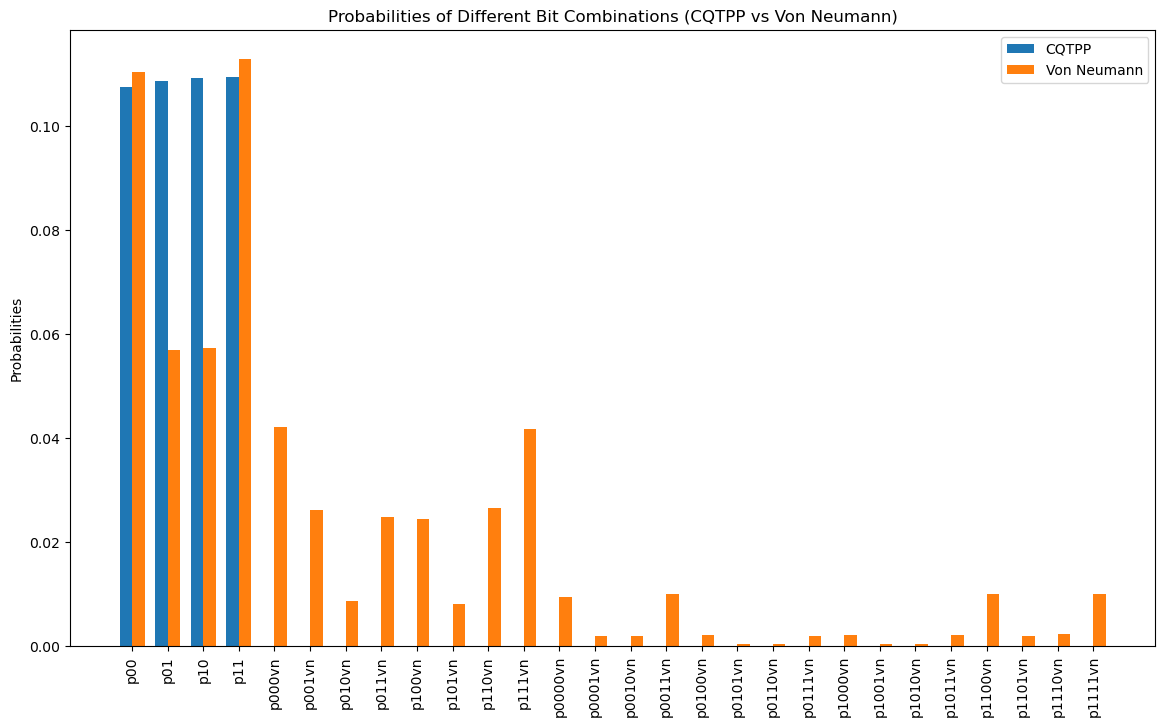

In [332]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['p00', 'p01', 'p10', 'p11', 'p000vn', 'p001vn', 'p010vn', 'p011vn', 'p100vn', 'p101vn', 'p110vn', 'p111vn', 'p0000vn', 'p0001vn', 'p0010vn', 'p0011vn', 'p0100vn', 'p0101vn', 'p0110vn', 'p0111vn', 'p1000vn', 'p1001vn', 'p1010vn', 'p1011vn', 'p1100vn', 'p1101vn', 'p1110vn', 'p1111vn']

# Define the probabilities for CQTPP and Von Neumann
cqtpp_probs = [0.1076, 0.1087, 0.1092, 0.1095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
von_neumann_probs = [0.1104, 0.0569, 0.0574, 0.1129, 0.0422, 0.0262, 0.0086, 0.0249, 0.0245, 0.0080, 0.0265, 0.0417, 0.0095, 0.0019, 0.0020, 0.0100, 0.0021, 0.0003, 0.0003, 0.0019, 0.0021, 0.0004, 0.0004, 0.0021, 0.0100, 0.0019, 0.0022, 0.0100]

# Create the bar graph
x = np.arange(len(categories))
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width/2, cqtpp_probs, width, label='CQTPP')
rects2 = ax.bar(x + width/2, von_neumann_probs, width, label='Von Neumann')

ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of Different Bit Combinations (CQTPP vs Von Neumann)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

plt.show()


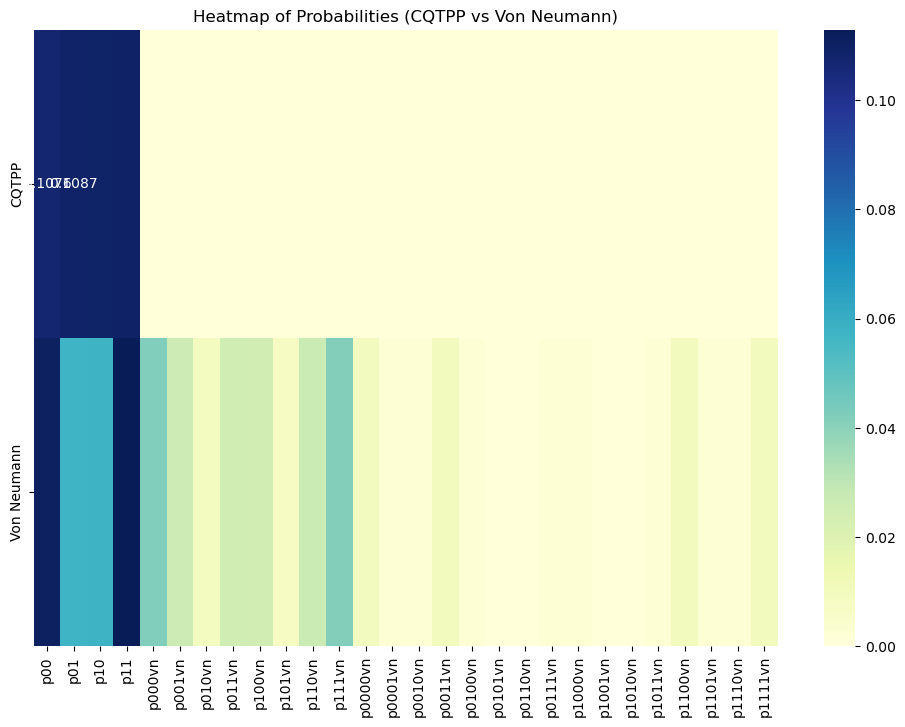

In [333]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for the heatmap
data = {
    'CQTPP': cqtpp_probs,
    'Von Neumann': von_neumann_probs
}

df = pd.DataFrame(data, index=categories)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.T, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Heatmap of Probabilities (CQTPP vs Von Neumann)")
plt.show()


In [334]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Define the categories (bit size 1, 2, 3, 4, etc.)
categories_1bit = ['p00', 'p01', 'p10', 'p11']
categories_2bit = ['p000vn', 'p001vn', 'p010vn', 'p011vn', 'p100vn', 'p101vn', 'p110vn', 'p111vn']
categories_3bit = ['p0000vn', 'p0001vn', 'p0010vn', 'p0011vn', 'p0100vn', 'p0101vn', 'p0110vn', 'p0111vn', 
                   'p1000vn', 'p1001vn', 'p1010vn', 'p1011vn', 'p1100vn', 'p1101vn', 'p1110vn', 'p1111vn']
# You can extend this list to more bits if necessary.

# Example probabilities (from your results)
cqtpp_probs_1bit = [0.1076, 0.1087, 0.1092, 0.1095]  # For CQTPP (1-bit outcomes)
von_neumann_probs_1bit = [0.1104, 0.0569, 0.0574, 0.1129]  # For Von Neumann (1-bit outcomes)

# For higher bits (example data, you would replace with actual results)
cqtpp_probs_2bit = [0, 0, 0, 0, 0, 0, 0, 0]
von_neumann_probs_2bit = [0.0422, 0.0262, 0.0086, 0.0249, 0.0245, 0.0080, 0.0265, 0.0417]

cqtpp_probs_3bit = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
von_neumann_probs_3bit = [0.0095, 0.0019, 0.0020, 0.0100, 0.0021, 0.0003, 0.0003, 0.0019, 0.0021, 0.0004, 
                           0.0004, 0.0021, 0.0100, 0.0019, 0.0022, 0.0100]

# Group probabilities by bit size into arrays
probs_cqtpp = np.array([cqtpp_probs_1bit, cqtpp_probs_2bit, cqtpp_probs_3bit])
probs_von_neumann = np.array([von_neumann_probs_1bit, von_neumann_probs_2bit, von_neumann_probs_3bit])

# Create a grouped bar chart for the probabilities
fig, ax = plt.subplots(figsize=(14, 8))

# Set up the positions for the bars
width = 0.35  # Bar width
x = np.arange(len(categories_1bit))  # The positions of the categories (1-bit)

# Plot the grouped bar chart for CQTPP and Von Neumann for each bit size
ax.bar(x - width/2, probs_cqtpp[0], width, label='CQTPP (1-bit)', color='b')
ax.bar(x + width/2, probs_von_neumann[0], width, label='Von Neumann (1-bit)', color='g')

# Update x-axis to match with the 2-bit and 3-bit
x2 = np.arange(len(categories_2bit))
ax.bar(x2 - width/2, probs_cqtpp[1], width, label='CQTPP (2-bit)', color='b')
ax.bar(x2 + width/2, probs_von_neumann[1], width, label='Von Neumann (2-bit)', color='g')

x3 = np.arange(len(categories_3bit))
ax.bar(x3 - width/2, probs_cqtpp[2], width, label='CQTPP (3-bit)', color='b')
ax.bar(x3 + width/2, probs_von_neumann[2], width, label='Von Neumann (3-bit)', color='g')

ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of Different Bit Combinations by Bit Size (CQTPP vs Von Neumann)')
ax.set_xticks(x2)
ax.set_xticklabels(categories_2bit, rotation=90)
ax.legend()

plt.show()

# Now create a heatmap for better visualization of overall distribution by bit size
df = pd.DataFrame({
    'CQTPP': np.concatenate(probs_cqtpp),
    'Von Neumann': np.concatenate(probs_von_neumann)
}, index=np.concatenate([categories_1bit, categories_2bit, categories_3bit]))

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.T, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Probabilities (CQTPP vs Von Neumann)")
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

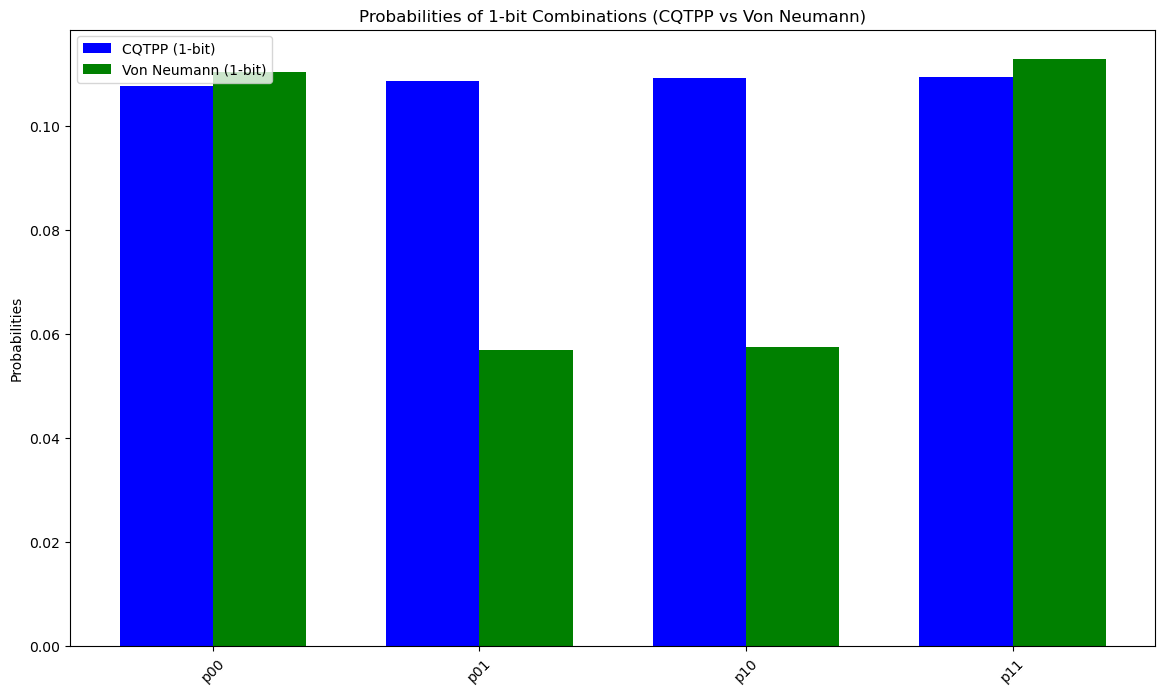

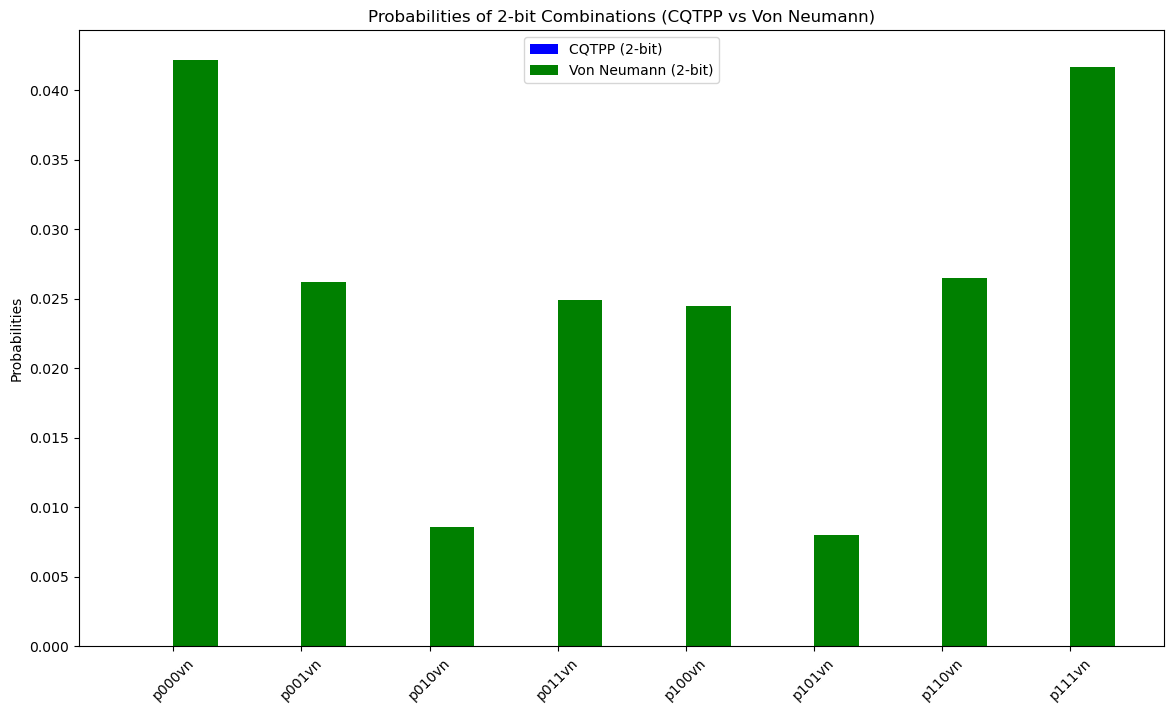

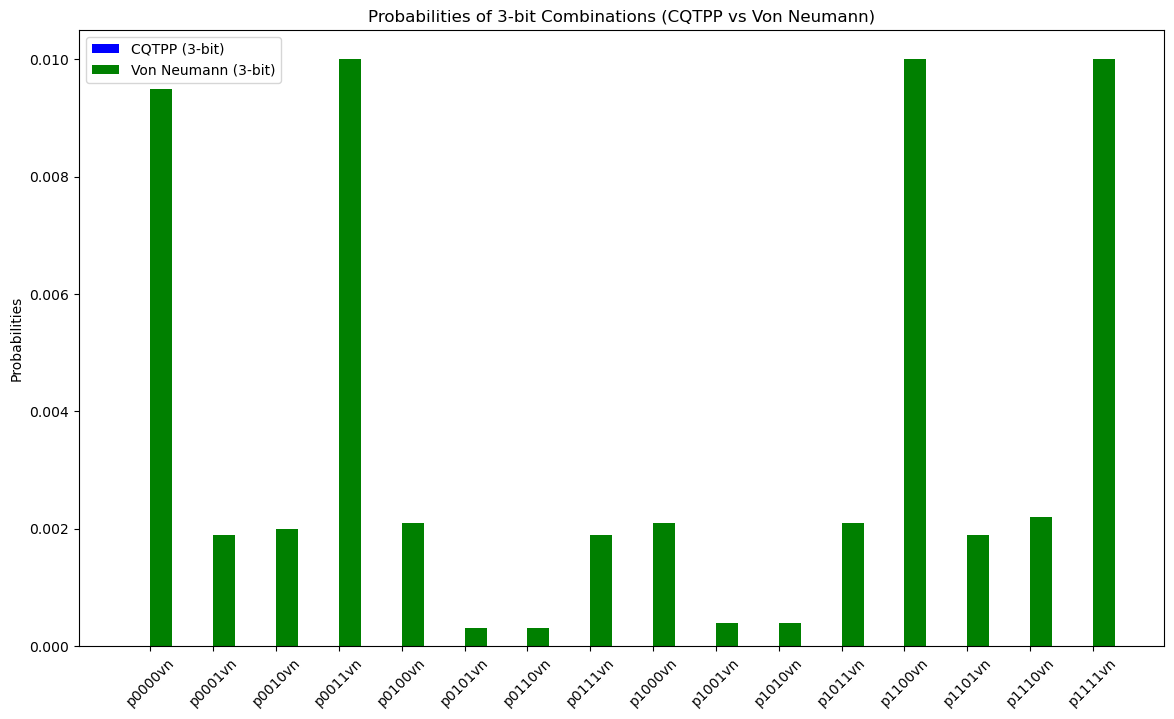

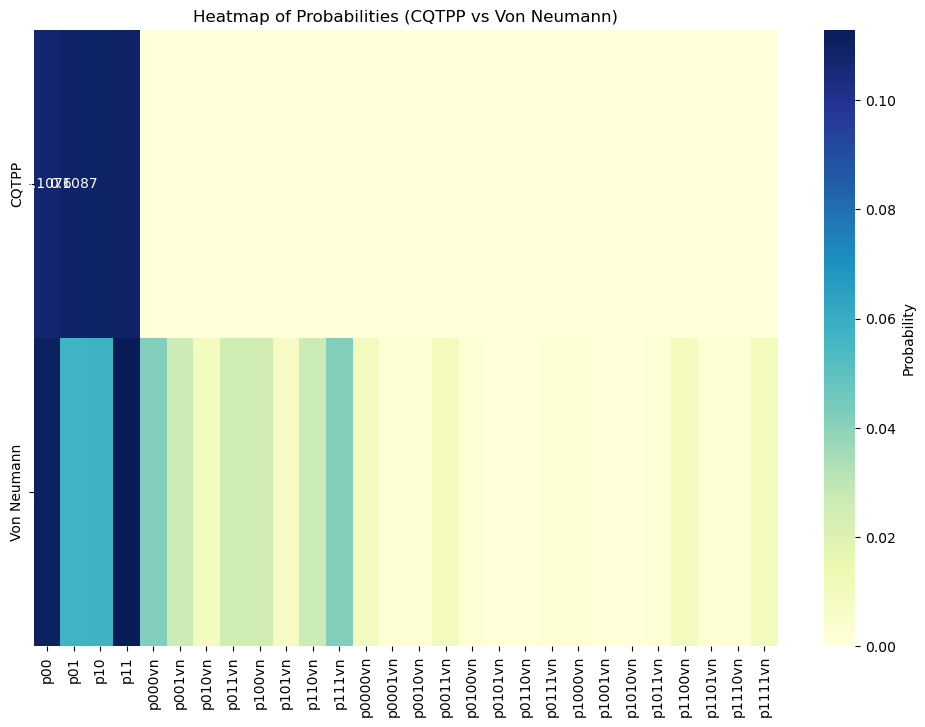

In [335]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Define the categories (bit size 1, 2, 3, 4, etc.)
categories_1bit = ['p00', 'p01', 'p10', 'p11']
categories_2bit = ['p000vn', 'p001vn', 'p010vn', 'p011vn', 'p100vn', 'p101vn', 'p110vn', 'p111vn']
categories_3bit = ['p0000vn', 'p0001vn', 'p0010vn', 'p0011vn', 'p0100vn', 'p0101vn', 'p0110vn', 'p0111vn', 
                   'p1000vn', 'p1001vn', 'p1010vn', 'p1011vn', 'p1100vn', 'p1101vn', 'p1110vn', 'p1111vn']

# Example probabilities (from your results)
cqtpp_probs_1bit = [0.1076, 0.1087, 0.1092, 0.1095]  # For CQTPP (1-bit outcomes)
von_neumann_probs_1bit = [0.1104, 0.0569, 0.0574, 0.1129]  # For Von Neumann (1-bit outcomes)

# For higher bits (example data, you would replace with actual results)
cqtpp_probs_2bit = [0, 0, 0, 0, 0, 0, 0, 0]
von_neumann_probs_2bit = [0.0422, 0.0262, 0.0086, 0.0249, 0.0245, 0.0080, 0.0265, 0.0417]

cqtpp_probs_3bit = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
von_neumann_probs_3bit = [0.0095, 0.0019, 0.0020, 0.0100, 0.0021, 0.0003, 0.0003, 0.0019, 0.0021, 0.0004, 
                           0.0004, 0.0021, 0.0100, 0.0019, 0.0022, 0.0100]

# Plotting
# Create a grouped bar chart for each bit size

# For 1-bit
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.35  # Bar width
x1 = np.arange(len(categories_1bit))  # Positions for 1-bit

ax.bar(x1 - width/2, cqtpp_probs_1bit, width, label='CQTPP (1-bit)', color='b')
ax.bar(x1 + width/2, von_neumann_probs_1bit, width, label='Von Neumann (1-bit)', color='g')

ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of 1-bit Combinations (CQTPP vs Von Neumann)')
ax.set_xticks(x1)
ax.set_xticklabels(categories_1bit, rotation=45)
ax.legend()
plt.show()

# For 2-bit
fig, ax = plt.subplots(figsize=(14, 8))
x2 = np.arange(len(categories_2bit))  # Positions for 2-bit

ax.bar(x2 - width/2, cqtpp_probs_2bit, width, label='CQTPP (2-bit)', color='b')
ax.bar(x2 + width/2, von_neumann_probs_2bit, width, label='Von Neumann (2-bit)', color='g')

ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of 2-bit Combinations (CQTPP vs Von Neumann)')
ax.set_xticks(x2)
ax.set_xticklabels(categories_2bit, rotation=45)
ax.legend()
plt.show()

# For 3-bit
fig, ax = plt.subplots(figsize=(14, 8))
x3 = np.arange(len(categories_3bit))  # Positions for 3-bit

ax.bar(x3 - width/2, cqtpp_probs_3bit, width, label='CQTPP (3-bit)', color='b')
ax.bar(x3 + width/2, von_neumann_probs_3bit, width, label='Von Neumann (3-bit)', color='g')

ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of 3-bit Combinations (CQTPP vs Von Neumann)')
ax.set_xticks(x3)
ax.set_xticklabels(categories_3bit, rotation=45)
ax.legend()
plt.show()

# Now create a heatmap for better visualization of overall distribution by bit size
df = pd.DataFrame({
    'CQTPP': cqtpp_probs_1bit + cqtpp_probs_2bit + cqtpp_probs_3bit,
    'Von Neumann': von_neumann_probs_1bit + von_neumann_probs_2bit + von_neumann_probs_3bit
}, index=categories_1bit + categories_2bit + categories_3bit)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.T, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Probabilities (CQTPP vs Von Neumann)")
plt.show()


In [348]:
import numpy as np

class VonNeumannPPAshraf:
    def __init__(self):
        pass

    def postprocess(self, input):
        # Split the input into two halves
        sample_1, sample_2 = split_bitstring(input)
        
        # Convert to bits where 0 is represented as 0 and non-zero as 1
        bits_1 = np.ravel(np.array(sample_1) == 0).astype(np.int8)
        bits_2 = np.ravel(np.array(sample_2) == 0).astype(np.int8)
        
        # Compare the bits from the two samples, where bits_1 should be <= bits_2
        arr = np.where(bits_1 > bits_2, np.zeros_like(bits_1), np.ones_like(bits_1))
        
        # If the bits are equal, mark them as NaN (to discard them later)
        arr = np.where(bits_1 == bits_2, np.nan * np.ones_like(bits_1), arr)
        
        # Remove the NaN values
        result = arr[~np.isnan(arr)].astype(np.int8)
        
        # If the result is greater than 1 bit, apply the transformation
        if len(result) > 1:
            msb = result[0]  # Most significant bit (MSB)
            if msb == 0:
                # Remove the MSB and keep the rest of the bits
                result = result[1:]
            elif msb == 1:
                # Manually invert the bits (flip 0 -> 1 and 1 -> 0)
                result = np.array([1 - bit for bit in result])  # Flipping each bit
                # Remove the new MSB (after inversion)
                result = result[1:]
        
        return result





In [349]:
def experiment(x, iterations=10000):
    # Initialize counters for each outcome
    p00 = 0
    p01 = 0
    p10 = 0
    p11 = 0
    p0cq = 0
    p1cq = 0
    p0vn = 0
    p1vn = 0
    p00vn = 0
    p01vn = 0
    p10vn = 0
    p11vn = 0
    p000vn = 0
    p001vn = 0
    p010vn = 0
    p011vn = 0
    p100vn = 0
    p101vn = 0
    p110vn = 0
    p111vn = 0
    p0000vn = 0
    p0001vn = 0
    p0010vn = 0
    p0011vn = 0
    p0100vn = 0
    p0101vn = 0
    p0110vn = 0
    p0111vn = 0
    p1000vn = 0
    p1001vn = 0
    p1010vn = 0
    p1011vn = 0
    p1100vn = 0
    p1101vn = 0
    p1110vn = 0
    p1111vn = 0
    pemcq = 0
    pemvn = 0
    
    for _ in range(iterations):
        # Generate a bit list of size 4
        bit_list = generate_bit_list(x, size=4)
        
        # Apply post-processor 1 (CQTPP)
        processed_1 = CQTPP2(dep_seq_len=2).postprocess(bit_list)
        processed_1 = processed_1.tolist()
        
        # Handle CQTPP outcomes
        if len(processed_1) == 0:
            pemcq += 1
        elif len(processed_1) == 1:
            if processed_1[0] == 0:
                p0cq += 1
            elif processed_1[0] == 1:
                p1cq += 1
        elif len(processed_1) == 2:
            if processed_1 == [0, 1]:
                p01 += 1
            elif processed_1 == [1, 0]:
                p10 += 1
            elif processed_1 == [0, 0]:
                p00 += 1
            elif processed_1 == [1, 1]:
                p11 += 1
        
        # Apply post-processor 2 (Von Neumann)
        processed_2 = VonNeumannPPAshraf().postprocess(bit_list)
        processed_2 = processed_2.tolist()
        
        # Handle Von Neumann outcomes
        if len(processed_2) == 0:
            pemvn += 1
        elif len(processed_2) == 1:
            if processed_2[0] == 0:
                p0vn += 1
            elif processed_2[0] == 1:
                p1vn += 1
        elif len(processed_2) == 2:
            if processed_2 == [0, 1]:
                p01vn += 1
            elif processed_2 == [1, 0]:
                p10vn += 1
            elif processed_2 == [0, 0]:
                p00vn += 1
            elif processed_2 == [1, 1]:
                p11vn += 1
        elif len(processed_2) == 3:
            if processed_2 == [0, 0, 0]:
                p000vn += 1
            elif processed_2 == [0, 0, 1]:
                p001vn += 1
            elif processed_2 == [0, 1, 0]:
                p010vn += 1
            elif processed_2 == [0, 1, 1]:
                p011vn += 1
            elif processed_2 == [1, 0, 0]:
                p100vn += 1
            elif processed_2 == [1, 0, 1]:
                p101vn += 1
            elif processed_2 == [1, 1, 0]:
                p110vn += 1
            elif processed_2 == [1, 1, 1]:
                p111vn += 1
        elif len(processed_2) == 4:
            # 4-bit combinations
            if processed_2 == [0, 0, 0, 0]:
                p0000vn += 1
            elif processed_2 == [0, 0, 0, 1]:
                p0001vn += 1
            elif processed_2 == [0, 0, 1, 0]:
                p0010vn += 1
            elif processed_2 == [0, 0, 1, 1]:
                p0011vn += 1
            elif processed_2 == [0, 1, 0, 0]:
                p0100vn += 1
            elif processed_2 == [0, 1, 0, 1]:
                p0101vn += 1
            elif processed_2 == [0, 1, 1, 0]:
                p0110vn += 1
            elif processed_2 == [0, 1, 1, 1]:
                p0111vn += 1
            elif processed_2 == [1, 0, 0, 0]:
                p1000vn += 1
            elif processed_2 == [1, 0, 0, 1]:
                p1001vn += 1
            elif processed_2 == [1, 0, 1, 0]:
                p1010vn += 1
            elif processed_2 == [1, 0, 1, 1]:
                p1011vn += 1
            elif processed_2 == [1, 1, 0, 0]:
                p1100vn += 1
            elif processed_2 == [1, 1, 0, 1]:
                p1101vn += 1
            elif processed_2 == [1, 1, 1, 0]:
                p1110vn += 1
            elif processed_2 == [1, 1, 1, 1]:
                p1111vn += 1
    
    total = iterations
    probabilities = {
        # CQTPP probabilities
        'p00': p00 / total,
        'p01': p01 / total,
        'p10': p10 / total,
        'p11': p11 / total,
        'p0cq': p0cq / total,
        'p1cq': p1cq / total,
        'pemcq': pemcq / total,
        
        # Von Neumann probabilities
        'p0vn': p0vn / total,
        'p1vn': p1vn / total,
        'p00vn': p00vn / total,
        'p01vn': p01vn / total,
        'p10vn': p10vn / total,
        'p11vn': p11vn / total,
        'p000vn': p000vn / total,
        'p001vn': p001vn / total,
        'p010vn': p010vn / total,
        'p011vn': p011vn / total,
        'p100vn': p100vn / total,
        'p101vn': p101vn / total,
        'p110vn': p110vn / total,
        'p111vn': p111vn / total,
        'p0000vn': p0000vn / total,
        'p0001vn': p0001vn / total,
        'p0010vn': p0010vn / total,
        'p0011vn': p0011vn / total,
        'p0100vn': p0100vn / total,
        'p0101vn': p0101vn / total,
        'p0110vn': p0110vn / total,
        'p0111vn': p0111vn / total,
        'p1000vn': p1000vn / total,
        'p1001vn': p1001vn / total,
        'p1010vn': p1010vn / total,
        'p1011vn': p1011vn / total,
        'p1100vn': p1100vn / total,
        'p1101vn': p1101vn / total,
        'p1110vn': p1110vn / total,
        'p1111vn': p1111vn / total,
        'pemvn': pemvn / total,
    }
    
    return probabilities

# Example Usage
x = 0.3
probabilities = experiment(x, iterations=100000)

# Display Results
print("Probabilities after running the experiment (CQTPP and Von Neumann):")
for outcome, prob in probabilities.items():
    print(f"{outcome}: {prob:.4f}")


Probabilities after running the experiment (CQTPP and Von Neumann):
p00: 0.1002
p01: 0.1015
p10: 0.0988
p11: 0.1019
p0cq: 0.2318
p1cq: 0.2328
pemcq: 0.1329
p0vn: 0.3854
p1vn: 0.1799
p00vn: 0.0966
p01vn: 0.0513
p10vn: 0.0050
p11vn: 0.0494
p000vn: 0.0456
p001vn: 0.0024
p010vn: 0.0023
p011vn: 0.0446
p100vn: 0.0022
p101vn: 0.0002
p110vn: 0.0001
p111vn: 0.0023
p0000vn: 0.0000
p0001vn: 0.0000
p0010vn: 0.0000
p0011vn: 0.0000
p0100vn: 0.0000
p0101vn: 0.0000
p0110vn: 0.0000
p0111vn: 0.0000
p1000vn: 0.0000
p1001vn: 0.0000
p1010vn: 0.0000
p1011vn: 0.0000
p1100vn: 0.0000
p1101vn: 0.0000
p1110vn: 0.0000
p1111vn: 0.0000
pemvn: 0.1329


In [677]:
import itertools
import numpy as np

# Define the number of bits
N = 20  # Change this to your desired value

# Define probabilities
def get_probability_equation(bits):
    probabilities = []
    for i in range(0, len(bits), 2):
        bit_pair = ''.join(map(str, bits[i:i+2]))
        if bit_pair == '00':
            probabilities.append('p1')
        elif bit_pair == '01':
            probabilities.append('p2')
        elif bit_pair == '10':
            probabilities.append('p3')
        elif bit_pair == '11':
            probabilities.append('p4')
    return ''.join(probabilities)

# Generate all combinations of N-bit binary numbers
combinations = list(itertools.product([0, 1], repeat=N))

# Initialize the postprocessors
post_processor_1 = CQTPP2(dep_seq_len=2)
post_processor_2 = VonNeumannPPTEST()

# Process each combination using both post-processors and store results
results = []
probability_equations = []  # To store the probability equations for each input bit list
von_neumann_prob_equations = {}  # To store summed equations for each unique Von Neumann result

for bits in combinations:
    bits_list = list(bits)  # Ensure input is a list
    processed_1 = post_processor_1.postprocess(bits_list)  # Process as a bit list
    processed_2 = post_processor_2.postprocess(bits_list)  # Process as a bit list
    
    # Get the probability equation
    prob_eq = get_probability_equation(bits_list)
    probability_equations.append(prob_eq)
    
    # Store the results
    results.append((bits, processed_1, processed_2, prob_eq))

    # Sum the probability equations for Von Neumann postprocessor results
    if tuple(processed_2) not in von_neumann_prob_equations:
        von_neumann_prob_equations[tuple(processed_2)] = []
    von_neumann_prob_equations[tuple(processed_2)].append(prob_eq)

# Output the table
print(f"{'Bits':>{N*2}} | CQTPP          | VonNeuPP          | Probability Equation")
print("-" * (N * 2 + 40))
for bits, result_1, result_2, prob_eq in results:
    bits_str = ''.join(map(str, bits))
    result_1_str = ''.join(map(str, result_1))
    result_2_str = ''.join(map(str, result_2))
    
    result_1_str = 'X' if result_1_str == '' else result_1_str
    result_2_str = 'X' if result_2_str == '' else result_2_str
    print(f"{bits_str:>{N*2}} | {result_1_str:13} | {result_2_str:13} | {prob_eq:18}")

# Sum the probability equations for each unique Von Neumann result
print("\nSumming probability equations for each unique Von Neumann output:")
for vn_result, equations in von_neumann_prob_equations.items():
    print(f"Von Neumann result: {vn_result} => Sum of probabilities: {' + '.join(equations)}")


KeyboardInterrupt: 

In [404]:
for vn_result, equations in von_neumann_prob_equations.items():
    if len(vn_result) == 5:
        print(f"Von Neumann result: {vn_result} => Sum of probabilities: {' + '.join(equations)}")
    
    #if vn_result in [(0, 0, 1), (0, 1, 1)]:
     #   print(f"Von Neumann result: {vn_result} => Sum of probabilities: {' + '.join(equations)}")
    

Von Neumann result: (0, 0, 0, 0, 0) => Sum of probabilities: p1p1p2p4p4
Von Neumann result: (0, 0, 0, 0, 1) => Sum of probabilities: p1p1p4p4p3
Von Neumann result: (0, 0, 0, 1, 0) => Sum of probabilities: p1p2p2p4p2
Von Neumann result: (0, 0, 0, 1, 1) => Sum of probabilities: p1p2p4p4p1
Von Neumann result: (0, 0, 1, 0, 0) => Sum of probabilities: p1p3p2p3p4
Von Neumann result: (0, 0, 1, 0, 1) => Sum of probabilities: p1p3p4p3p3
Von Neumann result: (0, 0, 1, 1, 0) => Sum of probabilities: p1p4p2p3p2
Von Neumann result: (0, 0, 1, 1, 1) => Sum of probabilities: p1p4p4p3p1
Von Neumann result: (0, 1, 0, 0, 0) => Sum of probabilities: p2p1p2p2p4
Von Neumann result: (0, 1, 0, 0, 1) => Sum of probabilities: p2p1p4p2p3
Von Neumann result: (0, 1, 0, 1, 0) => Sum of probabilities: p2p2p2p2p2
Von Neumann result: (0, 1, 0, 1, 1) => Sum of probabilities: p2p2p4p2p1
Von Neumann result: (0, 1, 1, 0, 0) => Sum of probabilities: p2p3p2p1p4
Von Neumann result: (0, 1, 1, 0, 1) => Sum of probabilities: p2p

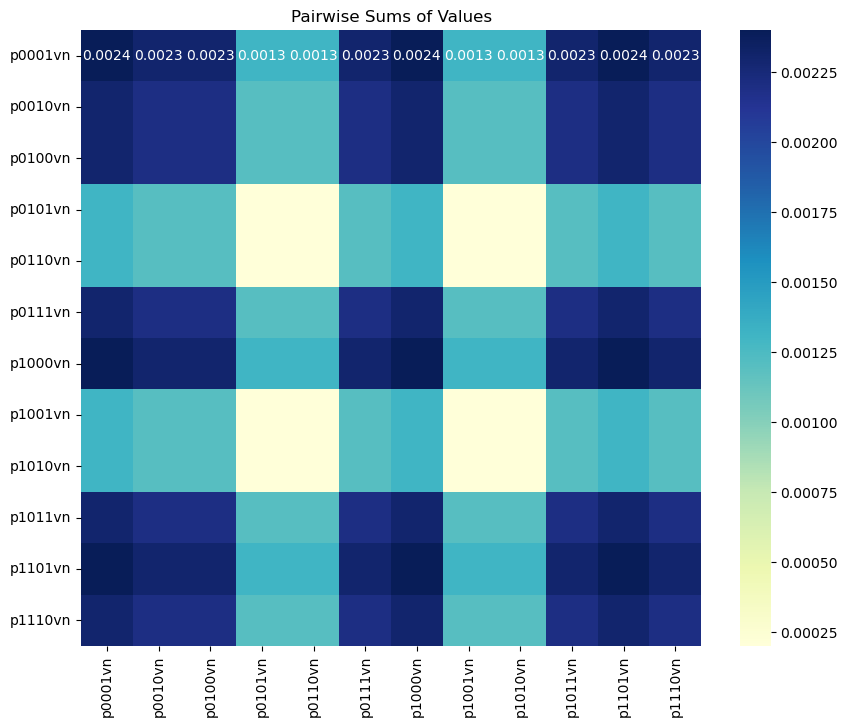

In [379]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data: labels and their corresponding values
labels = [
    "p0000vn", "p0001vn", "p0010vn", "p0011vn", "p0100vn", 
    "p0101vn", "p0110vn", "p0111vn", "p1000vn", "p1001vn", 
    "p1010vn", "p1011vn", "p1100vn", "p1101vn", "p1110vn", "p1111vn"
]
values = [
    0.0222, 0.0012, 0.0011, 0.0225, 0.0011, 0.0001, 0.0001, 0.0011, 
    0.0012, 0.0001, 0.0001, 0.0011, 0.0224, 0.0012, 0.0011, 0.0225
]

labels = [
     "p0001vn", "p0010vn", "p0100vn", 
    "p0101vn", "p0110vn", "p0111vn", "p1000vn", "p1001vn", 
    "p1010vn", "p1011vn", "p1101vn", "p1110vn"
]
values = [
     0.0012, 0.0011, 0.0011, 0.0001, 0.0001, 0.0011, 
    0.0012, 0.0001, 0.0001, 0.0011, 0.0012, 0.0011, 
]

# Convert values to a numpy array for easy manipulation
values = np.array(values)

# Compute pairwise sums
pairwise_sums = np.add.outer(values, values)

# Create a heatmap of the pairwise sums
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_sums, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("Pairwise Sums of Values")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [394]:
from itertools import product

def generate_clusters(N):
    bitstrings = ["".join(bits) for bits in product("01", repeat=N)]
    
    cluster1 = []
    cluster2 = []
    cluster3 = []

    for bitstring in bitstrings:
        # Count the number of 1s
        ones_count = bitstring.count('1')
        
        # Cluster 1: All 0s or all 1s, or half flipped
        if ones_count == 0 or ones_count == N or ones_count == N // 2:
            cluster1.append(bitstring)
        # Cluster 3: Alternating patterns (detected by XORing adjacent bits)
        elif all(bitstring[i] != bitstring[i+1] for i in range(N-1)):
            cluster3.append(bitstring)
        # Cluster 2: The rest
        else:
            cluster2.append(bitstring)

    return cluster1, cluster2, cluster3

# Example usage
N = 4
clusters = generate_clusters(N)
print("Cluster 1:", clusters[0])
print("Cluster 2:", clusters[1])
print("Cluster 3:", clusters[2])


Cluster 1: ['0000', '0011', '0101', '0110', '1001', '1010', '1100', '1111']
Cluster 2: ['0001', '0010', '0100', '0111', '1000', '1011', '1101', '1110']
Cluster 3: []


In [401]:
from itertools import product

def generate_clusters(N):
    # Generate all bitstrings of length N
    bitstrings = ["".join(bits) for bits in product("01", repeat=N)]
    print(bitstrings)
    # Initialize clusters
    cluster1 = []
    cluster2 = []
    cluster3 = []

    for bitstring in bitstrings:
        # Count occurrences of pairs
        count_00 = bitstring.count("00")
        count_11 = bitstring.count("11")
        count_01 = bitstring.count("01")
        count_10 = bitstring.count("10")
        print(bitstring)
        print("00",count_00)
        print("11",count_11)
        print("01",count_01)
        print("10",count_10)

        # Cluster 1: Dominated by 00 and 11
        if count_00 + count_11 >= count_01 + count_10:
            cluster1.append(bitstring)
        # Cluster 3: Alternating pattern (balanced 01 and 10 pairs)
        elif count_01 == count_10:
            cluster3.append(bitstring)
        # Cluster 2: Everything else
        else:
            cluster2.append(bitstring)

    return cluster1, cluster2, cluster3

# Example usage
N = 5
clusters = generate_clusters(N)
print("Cluster 1:", clusters[0])
print("Cluster 2:", clusters[1])
print("Cluster 3:", clusters[2])



['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
00000
00 2
11 0
01 0
10 0
00001
00 2
11 0
01 1
10 0
00010
00 1
11 0
01 1
10 1
00011
00 1
11 1
01 1
10 0
00100
00 2
11 0
01 1
10 1
00101
00 1
11 0
01 2
10 1
00110
00 1
11 1
01 1
10 1
00111
00 1
11 1
01 1
10 0
01000
00 1
11 0
01 1
10 1
01001
00 1
11 0
01 2
10 1
01010
00 0
11 0
01 2
10 2
01011
00 0
11 1
01 2
10 1
01100
00 1
11 1
01 1
10 1
01101
00 0
11 1
01 2
10 1
01110
00 0
11 1
01 1
10 1
01111
00 0
11 2
01 1
10 0
10000
00 2
11 0
01 0
10 1
10001
00 1
11 0
01 1
10 1
10010
00 1
11 0
01 1
10 2
10011
00 1
11 1
01 1
10 1
10100
00 1
11 0
01 1
10 2
10101
00 0
11 0
01 2
10 2
10110
00 0
11 1
01 1
10 2
10111
00 0
11 1
01 1
10 1
11000
00 1
11 1
01 0
10 1
11001
00 1
11 1
01 1
10 1
11010
00 0
11 1
01 1
10 2
11011
00 

In [416]:
import itertools
from collections import Counter

def experiment(x, iterations=10000):
    outcomes_cq = Counter()
    outcomes_vn = Counter()
    pemcq, pemvn = 0, 0

    for _ in range(iterations):
        # Generate a bit list of size 4
        bit_list = generate_bit_list(x, size=8)

        # Apply post-processor 1 (CQTPP)
        processed_1 = CQTPP2(dep_seq_len=2).postprocess(bit_list).tolist()
        if not processed_1:
            pemcq += 1
        else:
            outcomes_cq[tuple(processed_1)] += 1

        # Apply post-processor 2 (Von Neumann)
        processed_2 = VonNeumannPPTEST().postprocess(bit_list).tolist()
        if not processed_2:
            pemvn += 1
        else:
            outcomes_vn[tuple(processed_2)] += 1

    # Normalize the counters to get probabilities
    total = iterations
    probabilities_cq = {k: v / total for k, v in outcomes_cq.items()}
    probabilities_vn = {k: v / total for k, v in outcomes_vn.items()}

    # Sort probabilities in descending order
    sorted_cq = sorted(probabilities_cq.items(), key=lambda item: item[1], reverse=True)
    sorted_vn = sorted(probabilities_vn.items(), key=lambda item: item[1], reverse=True)

    # Return the sorted probabilities
    return {
        'cq': sorted_cq,
        'vn': sorted_vn,
        'pemcq': pemcq / total,
        'pemvn': pemvn / total
    }

# Example Usage
x = 0.3
probabilities = experiment(x, iterations=100000)

# Display Sorted Results
print("Probabilities for CQTPP (sorted):")
for outcome, prob in probabilities['cq']:
    print(f"{outcome}: {prob:.4f}")

print("\nProbabilities for Von Neumann (sorted):")
for outcome, prob in probabilities['vn']:
    print(f"{outcome}: {prob:.4f}")


Probabilities for CQTPP (sorted):
(0, 1): 0.0814
(1, 0): 0.0807
(1, 1): 0.0795
(0, 0): 0.0791
(0,): 0.0618
(1,): 0.0615
(1, 1, 1): 0.0477
(1, 0, 0): 0.0473
(0, 0, 0): 0.0473
(0, 1, 1): 0.0472
(0, 0, 1): 0.0468
(1, 1, 0): 0.0465
(1, 0, 1): 0.0464
(0, 1, 0): 0.0461
(0, 0, 1, 1): 0.0107
(1, 0, 1, 0): 0.0107
(1, 0, 0, 0): 0.0106
(0, 1, 0, 1): 0.0104
(0, 0, 0, 0): 0.0104
(1, 1, 1, 1): 0.0103
(1, 0, 1, 1): 0.0103
(0, 1, 1, 0): 0.0103
(0, 0, 0, 1): 0.0103
(0, 1, 1, 1): 0.0102
(0, 0, 1, 0): 0.0102
(1, 1, 0, 0): 0.0100
(1, 0, 0, 1): 0.0099
(0, 1, 0, 0): 0.0098
(1, 1, 0, 1): 0.0097
(1, 1, 1, 0): 0.0096

Probabilities for Von Neumann (sorted):
(0, 0): 0.0500
(1, 1): 0.0491
(1, 1, 1): 0.0440
(0, 0, 0): 0.0431
(1, 1, 1, 1): 0.0357
(0, 0, 0, 0): 0.0350
(0, 0, 1, 1): 0.0312
(0,): 0.0308
(1, 1, 0, 0): 0.0305
(1,): 0.0303
(0, 1, 1): 0.0272
(1, 1, 0): 0.0265
(1, 0, 0): 0.0260
(0, 0, 1): 0.0258
(1, 0): 0.0223
(0, 1): 0.0216
(1, 1, 1, 1, 1): 0.0188
(0, 0, 0, 0, 0): 0.0185
(0, 1, 1, 1): 0.0131
(0, 0, 0, 1)

In [421]:
import random
from collections import Counter

def calculate_frequencies(bitstring, n):
    """
    Calculate the frequencies of n-length bit combinations in the bitstring.
    """
    combinations = [bitstring[i:i+n] for i in range(len(bitstring) - n + 1)]
    return Counter(combinations)

def expected_frequency(length, n):
    """
    Calculate the expected frequency of an n-length bit combination in a random bitstring of given length.
    Expected frequency is 1 / 2^n for a truly random sequence.
    """
    return length / (2 ** n)

def randomness_test(generator, num_iterations, max_bit_length=4):
    """
    Test the randomness of the bitstring generator by comparing observed frequencies
    with the expected frequencies for different bit lengths (1, 2, 3, ..., max_bit_length).
    """
    # Generate the bitlist using the provided generator
    bitlist = [''.join(map(str, CQTPP2(dep_seq_len=2).postprocess(bit_list).tolist())) for _ in range(num_iterations)]
    
    # Convert the bitlist to a string (important for the analysis)
    #bitstring = ''.join(map(str, bitlist))
    
    results = {}

    for n in range(1, max_bit_length + 1):
        freq = calculate_frequencies(bitstring, n)
        expected = expected_frequency(num_iterations, n)
        results[n] = {
            "observed": freq,
            "expected": expected,
            "chi_squared": sum((count - expected) ** 2 / expected for count in freq.values())
        }
    
    return results

# Example bitstring generator (random 0 or 1)
def random_bit():
    return random.choice([0, 1])

# Number of iterations to generate bitstring
num_iterations = 10000

# Run the randomness test
results = randomness_test(generate_bit_list, num_iterations, max_bit_length=4)

# Display the results
for n, data in results.items():
    print(f"Testing for {n}-bit combinations:")
    print(f"  Observed frequencies: {dict(data['observed'])}")
    print(f"  Expected frequency: {data['expected']:.4f}")
    print(f"  Chi-squared statistic: {data['chi_squared']:.4f}")
    print("-" * 50)


NameError: name 'bitstring' is not defined

In [449]:
import random
from collections import Counter

def calculate_frequencies(bitstring, n):
    """
    Calculate the frequencies of n-length bit combinations in the bitstring.
    """
    combinations = [bitstring[i:i+n] for i in range(len(bitstring) - n + 1)]
    return Counter(combinations)

def expected_frequency(length, n):
    """
    Calculate the expected frequency of an n-length bit combination in a random bitstring of given length.
    Expected frequency is 1 / 2^n for a truly random sequence.
    """
    return length / (2 ** n)

def randomness_test(generator, num_iterations, max_bit_length=4):
    """
    Test the randomness of the bitstring generator by comparing observed frequencies
    with the expected frequencies for different bit lengths (1, 2, 3, ..., max_bit_length).
    """
    bitstring = ''.join([''.join(map(str, CQTPP2(dep_seq_len=2).postprocess(generator(0.3,20)).tolist())) for _ in range(num_iterations)])
    results = {}

    for n in range(1, max_bit_length + 1):
        freq = calculate_frequencies(bitstring, n)
        expected = expected_frequency(num_iterations, n)
        results[n] = {
            "observed": freq,
            "expected": expected,
            "chi_squared": sum((count - expected) ** 2 / expected for count in freq.values())
        }
    
    return results

# Example bitstring generator (random 0 or 1)
def random_bit():
    return random.choice([0, 1])

# Number of iterations to generate bitstring
num_iterations = 10000

# Run the randomness test
results = randomness_test(generate_bit_list, num_iterations, max_bit_length=4)

# Display the results
for n, data in results.items():
    print(f"Testing for {n}-bit combinations:")
    print(f"  Observed frequencies: {dict(data['observed'])}")
    print(f"  Expected frequency: {data['expected']:.4f}")
    print(f"  Chi-squared statistic: {data['chi_squared']:.4f}")
    print("-" * 50)


Testing for 1-bit combinations:
  Observed frequencies: {'1': 31818, '0': 31805}
  Expected frequency: 5000.0000
  Chi-squared statistic: 287542.6298
--------------------------------------------------
Testing for 2-bit combinations:
  Observed frequencies: {'10': 15847, '01': 15847, '11': 15970, '00': 15958}
  Expected frequency: 2500.0000
  Chi-squared statistic: 287537.3928
--------------------------------------------------
Testing for 3-bit combinations:
  Observed frequencies: {'101': 7866, '011': 7950, '111': 8020, '110': 7949, '100': 7981, '001': 7981, '010': 7897, '000': 7977}
  Expected frequency: 1250.0000
  Chi-squared statistic: 287535.0536
--------------------------------------------------
Testing for 4-bit combinations:
  Observed frequencies: {'1011': 4017, '0111': 3990, '1110': 3989, '1101': 3933, '0110': 3960, '1100': 4016, '1001': 3922, '0010': 4048, '0101': 3932, '1010': 3849, '0100': 3965, '1000': 4059, '0000': 3918, '0001': 4059, '0011': 3933, '1111': 4030}
  Expect

In [445]:
CQTPP2(dep_seq_len=2).postprocess(generate_bit_list(0.3,5)).tolist()

[1]

In [573]:
import random
from collections import Counter

def calculate_frequencies(bitstring, n):
    """
    Calculate the frequencies of n-length bit combinations in the bitstring.
    """
    combinations = [bitstring[i:i+n] for i in range(len(bitstring) - n + 1)]
    return Counter(combinations)

def expected_frequency(length, n):
    """
    Calculate the expected frequency of an n-length bit combination in a random bitstring of given length.
    Expected frequency is length / (2^n) for a truly random sequence.
    """
    return length / (2 ** n)

def randomness_test(generator, num_iterations, max_bit_length=4):
    """
    Test the randomness of the bitstring generator by comparing observed frequencies
    with the expected frequencies for different bit lengths (1, 2, 3, ..., max_bit_length).
    """
    # Generate the bitstring from the generator
    bitstring = ''.join([''.join(map(str, CQTPP2(dep_seq_len=2).postprocess(generator(0.3,20)).tolist())) for _ in range(num_iterations)])

    # Ensure bitstring is not empty
    if len(bitstring) == 0:
        print("Generated an empty bitstring, skipping test.")
        return None

    results = {}

    for n in range(1, max_bit_length + 1):
        freq = calculate_frequencies(bitstring, n)
        expected = expected_frequency(num_iterations, n)
        results[n] = {
            "observed": freq,
            "expected": expected,
            "chi_squared": sum((count - expected) ** 2 / expected for count in freq.values())
        }

    return results

# Example bitstring generator (random 0 or 1)
def random_bit(probability, length):
    """
    Generates a list of 0s and 1s of the specified length based on a given probability.
    """
    return [np.random.choice([0, 1], p = [probability, 1- probability] ) for _ in range(length)]

# Number of iterations to generate bitstring
num_iterations = 10000

# Run the randomness test
results = randomness_test(random_bit, num_iterations, max_bit_length=4)

# Display the results
if results:
    for n, data in results.items():
        print(f"Testing for {n}-bit combinations:")
        print(f"  Observed frequencies: {dict(data['observed'])}")
        print(f"  Expected frequency: {data['expected']:.4f}")
        print(f"  Chi-squared statistic: {data['chi_squared']:.4f}")
        print("-" * 50)


Testing for 1-bit combinations:
  Observed frequencies: {'1': 16550, '0': 16534}
  Expected frequency: 5000.0000
  Chi-squared statistic: 53287.1312
--------------------------------------------------
Testing for 2-bit combinations:
  Observed frequencies: {'10': 8261, '01': 8261, '11': 8288, '00': 8273}
  Expected frequency: 2500.0000
  Chi-squared statistic: 53282.6860
--------------------------------------------------
Testing for 3-bit combinations:
  Observed frequencies: {'101': 4130, '010': 4130, '011': 4130, '110': 4130, '100': 4131, '000': 4142, '001': 4131, '111': 4158}
  Expected frequency: 1250.0000
  Chi-squared statistic: 53278.4400
--------------------------------------------------
Testing for 4-bit combinations:
  Observed frequencies: {'1010': 2057, '0101': 2060, '1011': 2073, '0110': 2047, '1100': 2061, '1000': 2030, '0001': 2030, '0010': 2073, '0000': 2112, '0100': 2070, '1001': 2101, '0011': 2057, '0111': 2083, '1111': 2075, '1110': 2083, '1101': 2069}
  Expected freq

In [483]:
class CQTPP3:
    """Implementation of the CQTPP

    Parameters:
        dep_seq_len (int): The length of the dependent sequences.
    """

    def __init__(self, **kwargs):
        self.__dep_seq_len = kwargs.get("dep_seq_len")
        if self.__dep_seq_len is None:
            self.__dep_seq_len = 1

    
    def postprocess(self, input):
        ouput = np.array([], dtype=np.int8)
        sample_1, sample_2 = split_bitstring(input)
        ouput_disc = np.array([], dtype=np.int8)
        for i in range(len(sample_1) // self.__dep_seq_len):
            sub_s1 = sample_1[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            sub_s2 = sample_2[i * self.__dep_seq_len : (i + 1) * self.__dep_seq_len]
            postprocess_output = VonNeumannPP().postprocess(sub_s1, sub_s2)
            if np.size(postprocess_output):
                ouput = np.append(ouput, np.array([postprocess_output[0]]))
                ouput_disc = np.append(ouput_disc,np.array([postprocess_output[1:]]) )
        return ouput, ouput_disc

In [638]:
ou,di = CQTPP3(dep_seq_len = 6).postprocess(generate_bit_list(0.3, 100000))
ou2, di2 =CQTPP3(dep_seq_len = 6).postprocess(di)
ou3, di3 =CQTPP3(dep_seq_len = 6).postprocess(di2)
len(ou)

15869

In [634]:
def IterCQTPP(input, it,dpq):
    oui, dii = CQTPP3(dep_seq_len = dpq).postprocess(input)
    out_final = oui
    for _ in range(it-1):
        oui, dii = CQTPP3(dep_seq_len = dpq).postprocess(dii)
        out_final = np.append(out_final, oui)
    return out_final

In [659]:
len(IterCQTPP(generate_bit_list(0.3, 100000),4,2))

34860

In [561]:
calculate_autocorrelation(IterCQTPP(generate_bit_list(0.3, 100000), 4),2)

-0.002576882330250472

In [570]:
from tqdm import tqdm

entros = []

# Add tqdm progress bar to the loop
for _ in tqdm(range(1000), desc="Calculating entropy"):
    entros.append(calculate_entropy(IterCQTPP(generate_bit_list(0.3, 10000), 4)))

# Print the mean entropy
print(np.mean(entros))


Calculating entropy: 100%|█████████████████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.35it/s]

0.9998146378067131


In [603]:
calculate_entropy(IterCQTPP(random_bit(0.9, 100000), 2))

0.9999945361350138

In [682]:
calculate_autocorrelation(IterCQTPP(generate_bit_list(0.3, 1000000),2,2),1)

-0.0007544978628047982

In [685]:
import numpy as np

def generate_markov_bitlist(length, P1=0.5, phi1=0.0):
    """
    Generates a bitlist using a 1-bit Markov chain model (MKV1).

    Args:
        length (int): Length of the generated bitlist.
        P1 (float): Probability of state 1.
        phi1 (float): Autocorrelation at lag 1.

    Returns:
        list: Generated bitlist.
    """
    # Calculate transition probabilities using the MKV1 model
    T01 = P1 * (1 - phi1)
    T11 = phi1 + T01
    T00 = 1 - T01
    T10 = 1 - T11

    # Validate probabilities
    if not (0 <= T01 <= 1 and 0 <= T11 <= 1):
        raise ValueError("Transition probabilities must be between 0 and 1.")

    # Initial state probabilities
    P0 = 1 - P1

    # Generate the bitlist
    bitlist = [np.random.choice([0, 1], p=[P0, P1])]

    for _ in range(1, length):
        current_state = bitlist[-1]
        if current_state == 0:
            next_bit = np.random.choice([0, 1], p=[T00, T01])
        else:
            next_bit = np.random.choice([0, 1], p=[T10, T11])
        bitlist.append(next_bit)

    return bitlist

# Example usage



In [695]:
bitlist = generate_markov_bitlist(length=10000, P1=0.6, phi1=0.3)
#print(bitlist)

In [696]:
import numpy as np

def calculate_autocorrelation(bitlist, lag):
    """
    Calculates the autocorrelation of a given bitlist at a specified lag.

    Args:
        bitlist (list): The input bitstream (list of 0s and 1s).
        lag (int): The lag value for which to calculate the autocorrelation.

    Returns:
        float: The autocorrelation value at the specified lag.
    """
    n = len(bitlist)
    if lag >= n:
        raise ValueError("Lag must be less than the length of the bitlist.")

    # Convert the bitlist to a NumPy array for efficient computation
    bitlist = np.array(bitlist)

    # Calculate the mean of the bitlist
    mean = np.mean(bitlist)

    # Calculate the autocovariance and variance
    autocovariance = np.sum((bitlist[:n-lag] - mean) * (bitlist[lag:] - mean)) / (n - lag)
    variance = np.var(bitlist)

    # Calculate autocorrelation
    autocorrelation = autocovariance / variance

    return autocorrelation

def is_autocorrelation_acceptable(n, autocorrelation):
    """
    Determines whether the autocorrelation is within the acceptable range.

    Args:
        n (int): The length of the bitstream.
        autocorrelation (float): The autocorrelation value to evaluate.

    Returns:
        bool: True if the autocorrelation is within the 95% confidence interval, False otherwise.
    """
    # Calculate the 95% confidence interval
    ci = 1.96 / np.sqrt(n)
    return -ci <= autocorrelation <= ci


In [731]:
calculate_entropy(MKV1().de_correlate(IterCQTPP(generate_markov_bitlist(length=1000000, P1=0.7, phi1=0.8),2,10)))

0.9999969540492277

In [702]:
is_autocorrelation_acceptable(1000,0.07998)

False

In [723]:
calculate_autocorrelation(MKV1().de_correlate(VonNeumannPPTEST().postprocess(generate_markov_bitlist(length=1000000, P1=0.6, phi1=0.8))),1)

0.6434750649070263

In [729]:
calculate_entropy(generate_markov_bitlist(length=100000, P1=0.7, phi1=0.8))

0.8871032693340221

In [734]:
measure_states = [(1, 0, 0, 0, 0), (0, 1, 0, 0, 0), (0, 0, 1, 0, 0), (0, 0, 0, 1, 0), (0, 0, 0, 0, 1), (1, 1, 0, 0, 0), (1, 0, 1, 0, 0),
                  (1, 0, 0, 1, 0), (1, 0, 0, 0, 1), (0, 1, 1, 0, 0), (0, 1, 0, 1, 0), (0, 1, 0, 0, 1), (0, 0, 1, 1, 0), (0, 0, 1, 0, 1),
                  (0, 0, 0, 1, 1)]

probabilities_12 = [0.06567060345865058,
 0.048462743697155114,
 0.008852683037193923,
 0.07594399843073138,
 0.07594399843073142,
 0.01939792151216582,
 0.030659002374392244,
 0.07670283775927167,
 0.10469529304458752,
 0.0769570459204424,
 0.1631766726242217,
 0.030103782202696716,
 0.010120489616506662,
 0.11520092475271582,
 0.09811200313853731]

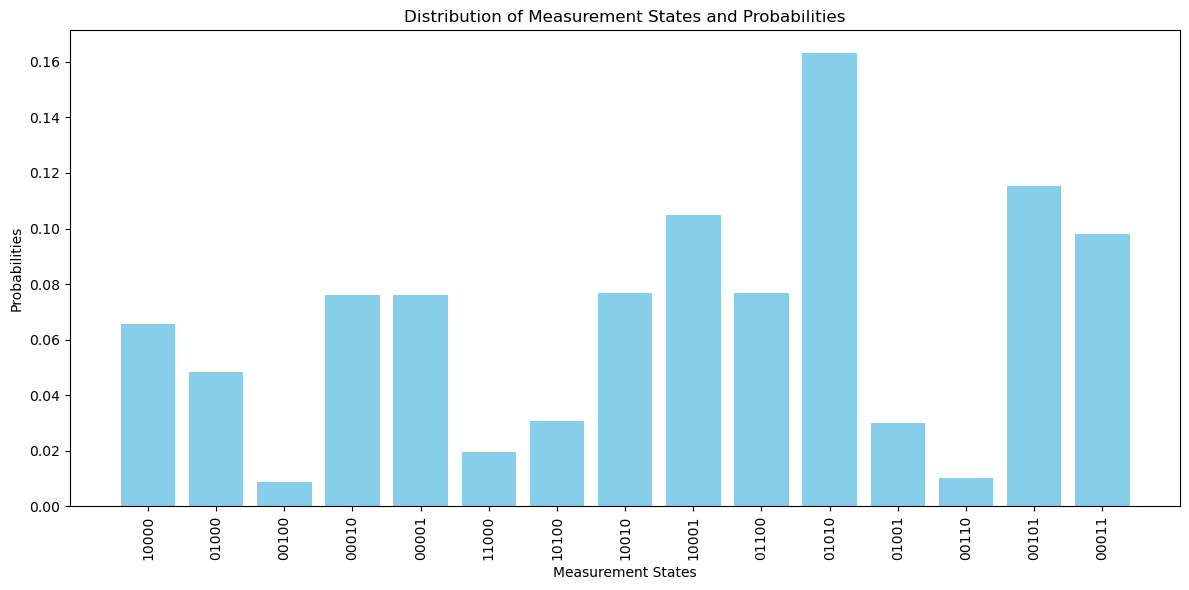

In [735]:
measure_states_labels = [''.join(map(str, state)) for state in measure_states]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(measure_states_labels, probabilities_12, color='skyblue')
plt.xlabel('Measurement States')
plt.ylabel('Probabilities')
plt.title('Distribution of Measurement States and Probabilities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [773]:
def generate_qbitlist(N):
    final_bitlist = ''
    while len(final_bitlist) < N:
        sampled_states = np.random.choice(measure_states_str, p=probabilities_12)
        final_bitlist = final_bitlist.join(sampled_states)
    return list(map(int, final_bitlist))[:N]

In [887]:
calculate_autocorrelation(generate_qbitlist(100000),5)

-0.08658445977150626

In [743]:
measure_states_str = [''.join(map(str, state)) for state in measure_states]

In [890]:
calculate_entropy(MKV1().de_correlate(IterCQTPP(generate_qbitlist(1000000),1,1)))

0.9999999999690472